# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
import math

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

df = pd.read_excel(r"merkur.xlsx")
df

WaterworksName  TotalFilters  MaxTypicalFlow  \
0              Asnæs Vandværk             6           50.00   
1             Assens Vandværk             4          110.00   
2   Astrup Vandværk - Esbjerg             4          120.00   
3    Astrup Vandværk - Skjern             2             NaN   
4           Avernakø Vandværk             2             NaN   
..                        ...           ...             ...   
74       Værket ved Regnemark            16         1426.00   
75        Værket ved Søndersø            20         1407.29   
76              Østerbyværket             6          250.00   
77   Østre Vandværk - Herning            12             NaN   
78       Østrup Skov Vandværk             5          329.92   

    AverageFilterArea  AverageTypicalRunVolume  AverageBackwashVolume  \
0              6.0000                5200.0000                  10.00   
1              4.9087                 300.0000                  28.00   
2             15.3439                3800.0000                  83.30   
3             16.0000                1200.0000                  26.00   
4              1.4950                 250.0000                   4.50   
..                ...                      ...                    ...   
74            47.9400                      NaN                 110.00   
75            10.1788                4500.0000                  57.00   
76            14.7525                2331.5014                  51.57   
77            37.4374                4400.0000                 134.00   
78            17.0000                2684.0000                  45.00   

   PrimaryTrigger  AverageTotalFilterDepth  OverallFilterGrainSizeMin  \
0            Time                      NaN                        NaN   
1          Volume                    310.0                        0.8   
2          Volume                    190.0                        2.0   
3          Volume                      NaN                        NaN   
4          Volume                      NaN                        1.6   
..            ...                      ...                        ...   
74            Mix                    142.0                        0.8   
75         Volume                    190.0                        0.8   
76           Time                    170.0                        1.4   
77         Volume                      NaN                        NaN   
78           Time                      NaN                        NaN   

    OverallFilterGrainSizeMax  AverageFilterBedVolume  FilterExploitation  \
0                         NaN                     NaN             57.8865   
1                         5.0                 15.2171             63.5216   
2                        35.0                 28.9706             64.9085   
3                         NaN                     NaN                 NaN   
4                        32.0                     NaN                 NaN   
..                        ...                     ...                 ...   
74                      150.0                 60.6866             91.6986   
75                        8.0                 19.3396             89.4056   
76                        4.0                 25.0792             19.3316   
77                        NaN                     NaN                 NaN   
78                        NaN                     NaN             24.6436   

             AerationType  OxygenFactor  Stage1HLR  TotalEBCT  Footprint  \
0                 Cascade        1.8800     1.3889        NaN   143.3412   
1           Air injection        1.6200    11.2045      33.20    16.7144   
2         Bottom aeration        2.2133     3.9350      28.97    44.6938   
3                 Cascade        2.0733        NaN        NaN   194.5880   
4                 Cascade        1.3133        NaN        NaN   412.3000   
..                    ...           ...        ...        ...        ...   
74                Cascade        1.5467     5.2

### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

### Step 0. Explore data

In [194]:
print("Display data types, some columns are type of object - probably string\n")
display(df.info())
print("\nBasics statitics for numeric columns")
display(df.describe())
print("\nBasics statitics for object type columns")
display(df.describe(include=object))

Display data types, some columns are type of object - probably string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WaterworksName             79 non-null     object 
 1   TotalFilters               79 non-null     int64  
 2   MaxTypicalFlow             63 non-null     float64
 3   AverageFilterArea          75 non-null     float64
 4   AverageTypicalRunVolume    77 non-null     float64
 5   AverageBackwashVolume      69 non-null     float64
 6   PrimaryTrigger             79 non-null     object 
 7   AverageTotalFilterDepth    46 non-null     float64
 8   OverallFilterGrainSizeMin  45 non-null     float64
 9   OverallFilterGrainSizeMax  45 non-null     float64
 10  AverageFilterBedVolume     45 non-null     float64
 11  FilterExploitation         63 non-null     float64
 12  AerationType               79 non-nul

None


Basics statitics for numeric columns


TotalFilters  MaxTypicalFlow  AverageFilterArea  \
count       79.0000         63.0000            75.0000   
mean         6.2532        218.5483            11.7011   
std          4.0461        276.0071             8.7136   
min          1.0000          6.5000             1.3273   
25%          3.0000         61.6650             4.9087   
50%          5.0000        120.0000            10.1788   
75%          8.0000        257.6500            14.9863   
max         20.0000       1426.0000            47.9400   

       AverageTypicalRunVolume  AverageBackwashVolume  \
count                  77.0000                69.0000   
mean                 5084.2511                39.4449   
std                  8915.4774                35.8309   
min                   250.0000                 0.8000   
25%                  1500.0000                15.0000   
50%                  3250.0000                30.0000   
75%                  5000.0000                50.0000   
max                 63000.0000               169.5500   

       AverageTotalFilterDepth  OverallFilterGrainSizeMin  \
count                  46.0000                    45.0000   
mean                  149.7417                     1.1829   
std                    60.1249                     0.6077   
min                    80.0000                     0.5000   
25%                   101.0000                     0.8000   
50%                   139.0000                     1.0000   
75%                   173.7500                     1.4000   
max                   310.0000                     4.0000   

       OverallFilterGrainSizeMax  AverageFilterBedVolume  FilterExploitation  \
count                    45.0000                 45.0000             63.0000   
mean                     24.5978                 18.2015             60.3646   
std                      27.9504                 11.6625             23.6302   
min                       1.4000                  1.7255             15.3356   
25%                       5.0000                  9.2902             40.8819   
50%                       9.0000                 18.0000             63.2796   
75%                      35.0000                 22.5090             78.5678   
max                     150.0000                 60.6866            117.3966   

       OxygenFactor  Stage1HLR  TotalEBCT  Footprint  SumOfld_layer  \
count       79.0000    58.0000    40.0000    75.0000        40.0000   
mean         1.9040     5.2092    39.8140    77.6067       933.2322   
std          0.2534     4.2312    28.0062    74.7006       691.1855   
min          1.1280     0.8076     4.8900     8.3525        90.8095   
25%          1.7867     2.3877    21.9325    30.6109       479.0035   
50%          1.9333     3.7425    32.4400    59.8301       842.8572   
75%          2.0900     5.8973    47.2325    94.3771      1090.5418   
max          2.3600    15.9544   154.1800   448.6142      2891.6667   

       UniformityCoefficient       UFRV      BW%   HLR_BW  TankCapacity  \
count                28.0000    72.0000  66.0000  52.0000       75.0000   
mean                  2.5539   312.0841   2.9590  31.6587       18.2931   
std                   3.9769   205.2204   5.5059  11.5998       14.2901   
min                   1.3720    40.7437   0.0737   0.4693        2.5761   
25%                   1.4697   166.4308   0.9995  28.1121        8.6975   
50%                   1.6390   258.6371   1.5258  30.8895       15.0977   
75%                   2.0635   433.8057   2.2602  35.8002       23.8510   
max                  22.6900  1130.0944  35.3860  68.0221       96.4333   

       TankExploitation  AbstractedVolume  
count           49.0000        7.9000e+01  
mean            24.3968        1.0983e+06  
std             18.8238        1.8546e+06  
min              2.4590        6.7100e+03  
25%             10.3943        2.4277e+05  
50%             19.4030        5.9803e+05  
75%             35.7143        1.2163e+06  
max             86.0140        


Basics statitics for object type columns


WaterworksName PrimaryTrigger     AerationType GravityPressureMixed  \
count               79             79               79                   79   
unique              79              4                8                    3   
top     Asnæs Vandværk         Volume  Bottom aeration              Gravity   
freq                 1             58               28                   52   

        Stages  
count       79  
unique       4  
top     Single  
freq        40

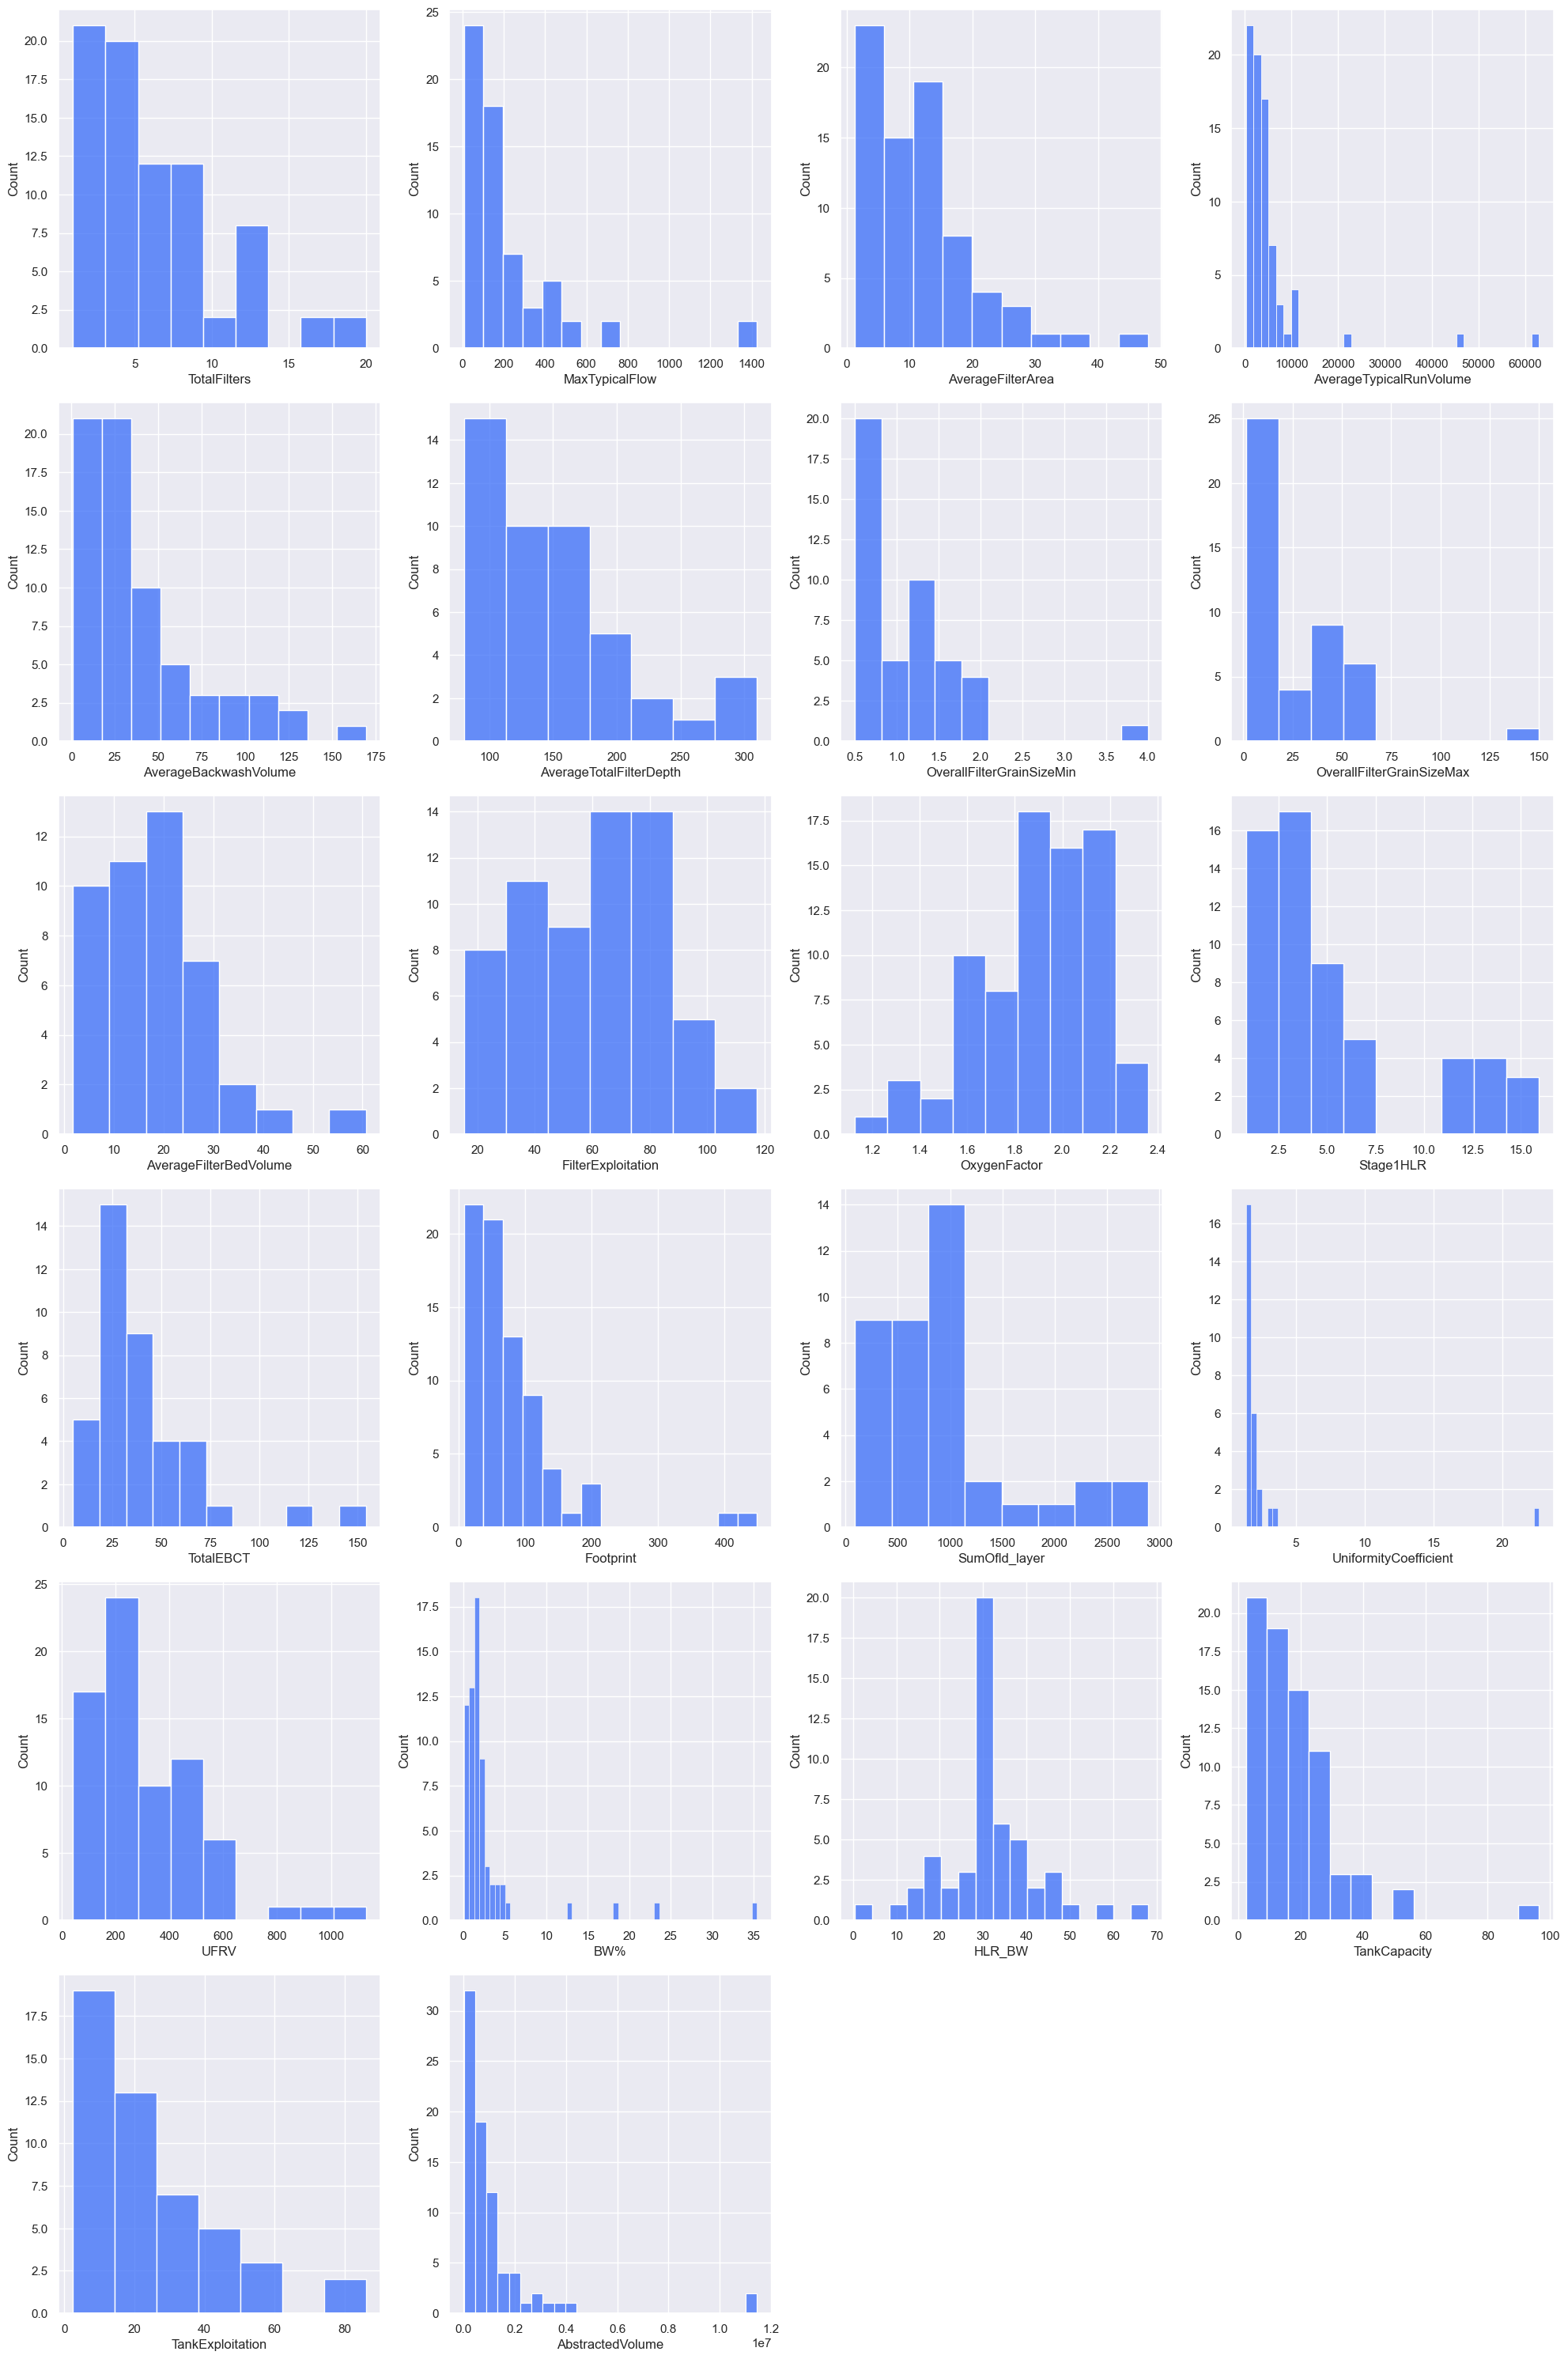

In [195]:
numeric_columns = df.select_dtypes(include=['number']).copy()
num_plots = len(numeric_columns.columns)
num_rows = (num_plots) // 4 + 1

sns.set_theme()
sns.set_palette(palette="rainbow")
plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numeric_columns.columns, start=1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data=numeric_columns[column])

plt.tight_layout()  
plt.show()

### Step 1. Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)

In [196]:
df = df.drop(columns=['WaterworksName'])
df = df.dropna(thresh=int(df.shape[1]*0.50))

### Step 2. Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?

Percentage of missing values in each column:


UniformityCoefficient        63.0
SumOfld_layer                47.0
TotalEBCT                    47.0
AverageFilterBedVolume       41.0
OverallFilterGrainSizeMin    41.0
OverallFilterGrainSizeMax    41.0
AverageTotalFilterDepth      39.0
TankExploitation             36.0
HLR_BW                       32.0
Stage1HLR                    24.0
MaxTypicalFlow               17.0
FilterExploitation           17.0
BW%                          13.0
AverageBackwashVolume         9.0
UFRV                          9.0
Footprint                     5.0
AverageFilterArea             5.0
TankCapacity                  4.0
AverageTypicalRunVolume       3.0
GravityPressureMixed          0.0
Stages                        0.0
TotalFilters                  0.0
OxygenFactor                  0.0
AerationType                  0.0
PrimaryTrigger                0.0
AbstractedVolume              0.0
dtype: float64

<Axes: >

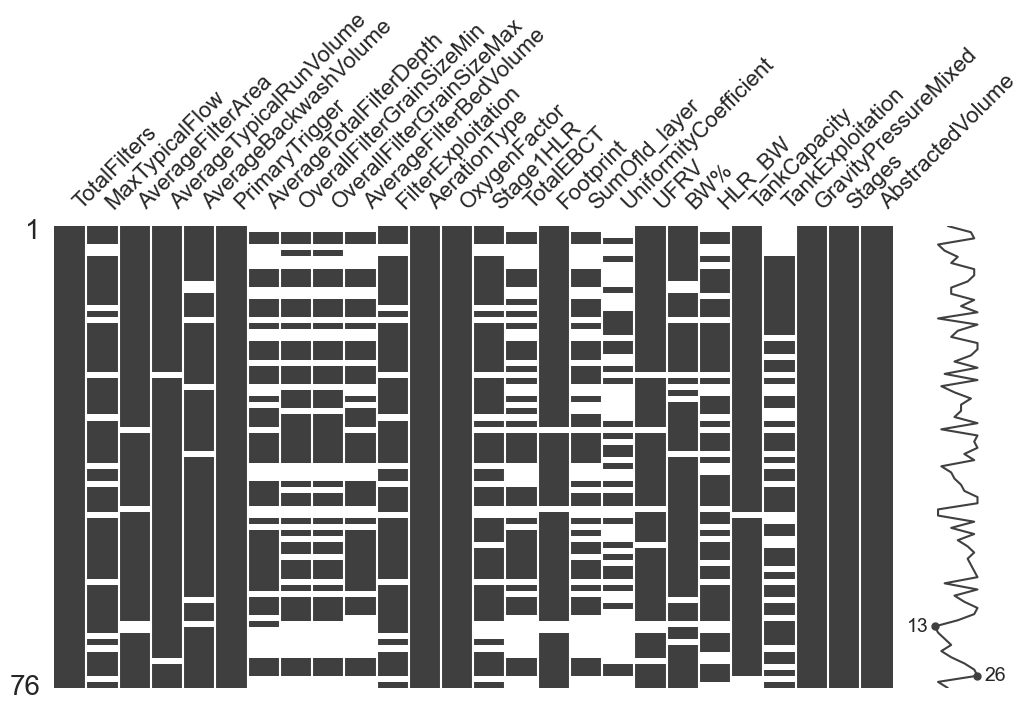

In [197]:
missing_percentage = round((df.isnull().sum() / len(df)) * 100, 0).sort_values(ascending=False)
print("Percentage of missing values in each column:")
display(missing_percentage)
msno.matrix(df,figsize=(12,6))

In [198]:
df.drop(['UniformityCoefficient','SumOfld_layer','TotalEBCT'], axis=1, inplace=True)
#We decided to remove all column which have more than 45% of missing data.

### Step 3. Scale numeric data.

In [199]:
non_numeric_columns = df.select_dtypes(exclude=['number'])
numeric_columns = df.select_dtypes(include=['number'])

print('Non-numeric columns names: ', ', ' .join(non_numeric_columns.columns))
print('Numeric columns names: ', ', '.join(numeric_columns.columns))
print('Amount of numeric columns', len(numeric_columns.columns))

Non-numeric columns names:  PrimaryTrigger, AerationType, GravityPressureMixed, Stages
Numeric columns names:  TotalFilters, MaxTypicalFlow, AverageFilterArea, AverageTypicalRunVolume, AverageBackwashVolume, AverageTotalFilterDepth, OverallFilterGrainSizeMin, OverallFilterGrainSizeMax, AverageFilterBedVolume, FilterExploitation, OxygenFactor, Stage1HLR, Footprint, UFRV, BW%, HLR_BW, TankCapacity, TankExploitation, AbstractedVolume
Amount of numeric columns 19


In [200]:
# We decided to set paratemers for MinMaxScaler to ensure that data will be strictly positive (>0), so minimal value is set to equal 0.000000001 and maximum to 1.
# This procedure was needed for box-cox transformation in step no. 8.

ct = ColumnTransformer([('scaling', MinMaxScaler(feature_range=(1e-9, 1)), numeric_columns.columns)],
                        remainder='passthrough')
scaled_numeric_data = ct.fit_transform(df)

column_names = list(numeric_columns.columns) + list(non_numeric_columns.columns)
df = pd.DataFrame(scaled_numeric_data, columns=column_names)
df[numeric_columns.columns] = df[numeric_columns.columns].apply(pd.to_numeric, errors='coerce')

display(df)

TotalFilters  MaxTypicalFlow  AverageFilterArea  AverageTypicalRunVolume  \
0         0.2632          0.0306             0.1002               7.8884e-02   
1         0.1579          0.0729             0.0768               7.9681e-04   
2         0.1579          0.0800             0.3007               5.6574e-02   
3         0.0526             NaN             0.3148               1.5139e-02   
4         0.0526             NaN             0.0036               1.0000e-09   
..           ...             ...                ...                      ...   
71        0.7895          1.0000             1.0000                      NaN   
72        1.0000          0.9868             0.1899               6.7729e-02   
73        0.2632          0.1715             0.2880               3.3171e-02   
74        0.5789             NaN             0.7747               6.6135e-02   
75        0.2105          0.2278             0.3362               3.8789e-02   

    AverageBackwashVolume  AverageTotalFilterDepth  OverallFilterGrainSizeMin  \
0                  0.0545                      NaN                        NaN   
1                  0.1612                   1.0000                     0.0857   
2                  0.4889                   0.4783                     0.4286   
3                  0.1493                      NaN                        NaN   
4                  0.0219                      NaN                     0.3143   
..                    ...                      ...                        ...   
71                 0.6471                   0.2696                     0.0857   
72                 0.3330                   0.4783                     0.0857   
73                 0.3009                   0.3913                     0.2571   
74                 0.7893                      NaN                        NaN   
75                 0.2619                      NaN                        NaN   

    OverallFilterGrainSizeMax  AverageFilterBedVolume  FilterExploitation  \
0                         NaN                     NaN              0.4169   
1                      0.0242                  0.2288              0.4721   
2                      0.2261                  0.4621              0.4857   
3                         NaN                     NaN                 NaN   
4                      0.2059                     NaN                 NaN   
..                        ...                     ...                 ...   
71                     1.0000                  1.0000              0.7482   
72                     0.0444                  0.2987              0.7257   
73                     0.0175                  0.3961              0.0392   
74                        NaN                     NaN                 NaN   
75                        NaN                     NaN              0.0912   

    OxygenFactor  Stage1HLR  Footprint        UFRV     BW%  HLR_BW  \
0         0.6104     0.0384     0.3342  9.7380e-01  0.0097     NaN   
1         0.3994     0.6864     0.0207  1.0000e-09  0.6492  0.4454   
2         0.8810     0.2065     0.0900  2.4580e-01  0.0600  0.4785   
3         0.7673        NaN     0.4610  4.0390e-02  0.0593     NaN   
4         0.1504        NaN     1.0000  1.4913e-01  0.0494     NaN   
..           ...        ...        ...         ...     ...     ...   
71        0.3398     0.2928     0.0390         NaN  0.0030     NaN   
72        0.8160     0.4031     0.0339  4.7321e-01  0.0329  0.7493   
73        0.4426     0.1331     0.4969  1.3830e-01  0.1238  0.4426   
74        0.8701        NaN     0.3569  6.2190e-02  1.0000  0.4675   
75        0.7998     0.2029     0.2693  1.3811e-01  0.0446     NaN   

    TankCapacity  TankExploitation  AbstractedVolume PrimaryTrigger  \
0     2.6336e-01               NaN        2.1561e-02           Time   
1     1.0000e-09               NaN        5.2881e-02         Volume   
2     2.0509e-01               NaN        5.9015e-02         Volume   
3     1.0631e-01    

### Step 4. Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?

In [201]:
df = pd.get_dummies(df, columns=["PrimaryTrigger", "AerationType", "GravityPressureMixed"])

label_encoder = LabelEncoder()
df['Stages'] = label_encoder.fit_transform(df['Stages'])

In [202]:
display(df)

TotalFilters  MaxTypicalFlow  AverageFilterArea  AverageTypicalRunVolume  \
0         0.2632          0.0306             0.1002               7.8884e-02   
1         0.1579          0.0729             0.0768               7.9681e-04   
2         0.1579          0.0800             0.3007               5.6574e-02   
3         0.0526             NaN             0.3148               1.5139e-02   
4         0.0526             NaN             0.0036               1.0000e-09   
..           ...             ...                ...                      ...   
71        0.7895          1.0000             1.0000                      NaN   
72        1.0000          0.9868             0.1899               6.7729e-02   
73        0.2632          0.1715             0.2880               3.3171e-02   
74        0.5789             NaN             0.7747               6.6135e-02   
75        0.2105          0.2278             0.3362               3.8789e-02   

    AverageBackwashVolume  AverageTotalFilterDepth  OverallFilterGrainSizeMin  \
0                  0.0545                      NaN                        NaN   
1                  0.1612                   1.0000                     0.0857   
2                  0.4889                   0.4783                     0.4286   
3                  0.1493                      NaN                        NaN   
4                  0.0219                      NaN                     0.3143   
..                    ...                      ...                        ...   
71                 0.6471                   0.2696                     0.0857   
72                 0.3330                   0.4783                     0.0857   
73                 0.3009                   0.3913                     0.2571   
74                 0.7893                      NaN                        NaN   
75                 0.2619                      NaN                        NaN   

    OverallFilterGrainSizeMax  AverageFilterBedVolume  FilterExploitation  \
0                         NaN                     NaN              0.4169   
1                      0.0242                  0.2288              0.4721   
2                      0.2261                  0.4621              0.4857   
3                         NaN                     NaN                 NaN   
4                      0.2059                     NaN                 NaN   
..                        ...                     ...                 ...   
71                     1.0000                  1.0000              0.7482   
72                     0.0444                  0.2987              0.7257   
73                     0.0175                  0.3961              0.0392   
74                        NaN                     NaN                 NaN   
75                        NaN                     NaN              0.0912   

    OxygenFactor  Stage1HLR  Footprint        UFRV     BW%  HLR_BW  \
0         0.6104     0.0384     0.3342  9.7380e-01  0.0097     NaN   
1         0.3994     0.6864     0.0207  1.0000e-09  0.6492  0.4454   
2         0.8810     0.2065     0.0900  2.4580e-01  0.0600  0.4785   
3         0.7673        NaN     0.4610  4.0390e-02  0.0593     NaN   
4         0.1504        NaN     1.0000  1.4913e-01  0.0494     NaN   
..           ...        ...        ...         ...     ...     ...   
71        0.3398     0.2928     0.0390         NaN  0.0030     NaN   
72        0.8160     0.4031     0.0339  4.7321e-01  0.0329  0.7493   
73        0.4426     0.1331     0.4969  1.3830e-01  0.1238  0.4426   
74        0.8701        NaN     0.3569  6.2190e-02  1.0000  0.4675   
75        0.7998     0.2029     0.2693  1.3811e-01  0.0446     NaN   

    TankCapacity  TankExploitation  AbstractedVolume  Stages  \
0     2.6336e-01               NaN        2.1561e-02       2   
1     1.0000e-09               NaN        5.2881e-02       0   
2     2.0509e-01               NaN        5.9015e-02       0   
3     1.0631e-01               NaN        1.3128

### Step 5. For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?

In [203]:
missing_columns = df.columns[df.isna().any()].tolist()

def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

<Axes: >

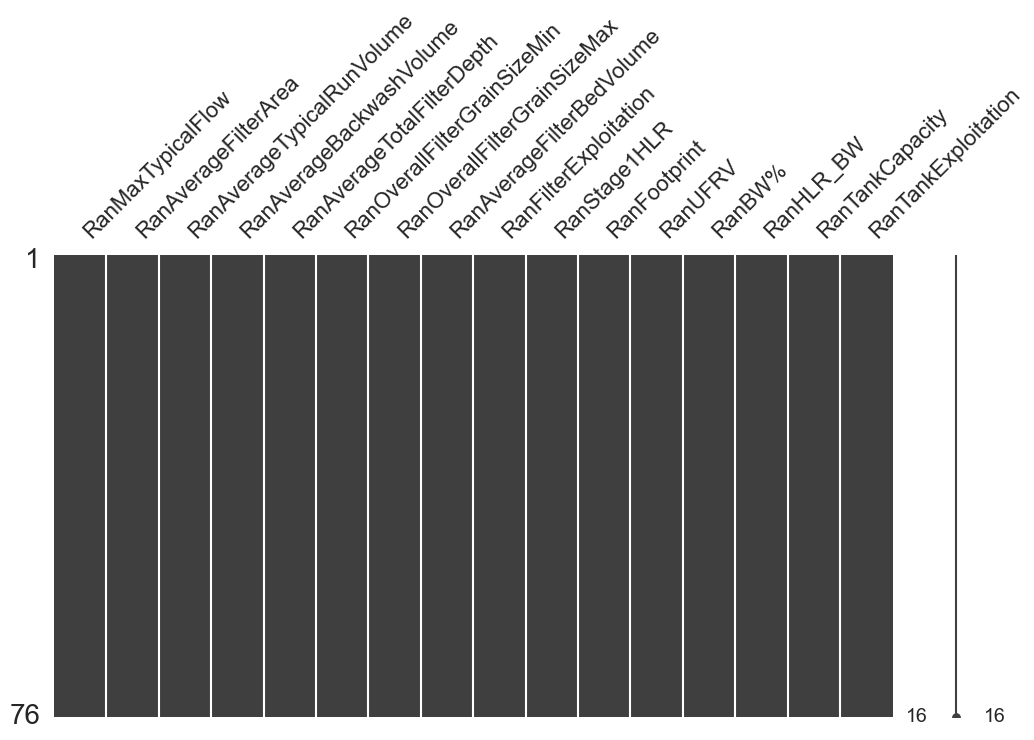

In [204]:
# Stochastic Regression Imputation 

random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]
msno.matrix(random_data,figsize=(12,6))

C:\Users\IZO21\AppData\Local\Temp\ipykernel_24336\3193412722.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
C:\Users\IZO21\AppData\Local\Temp\ipykernel_24336\3193412722.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_data["

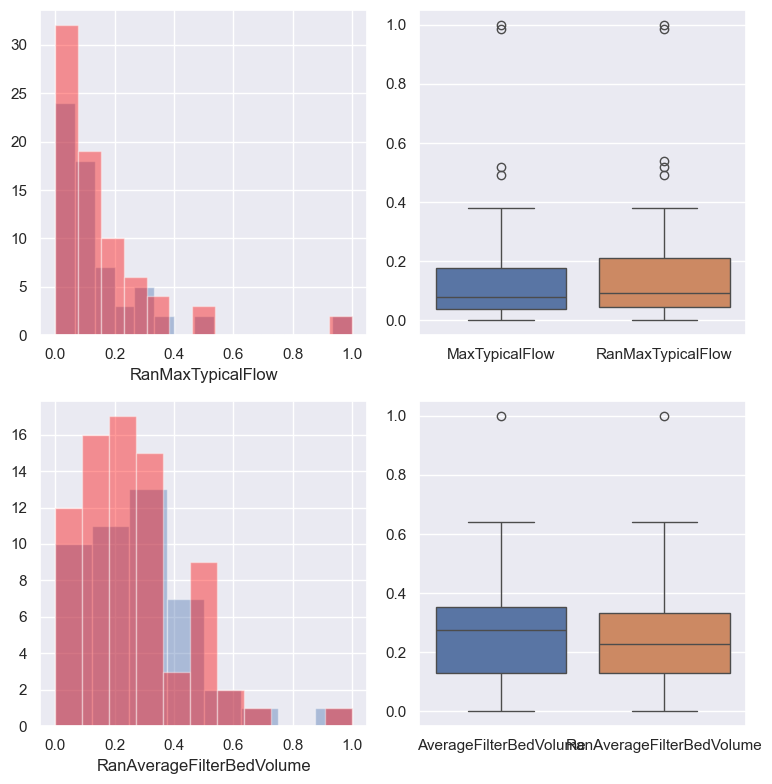

In [205]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["MaxTypicalFlow", "AverageFilterBedVolume"]):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

<Axes: >

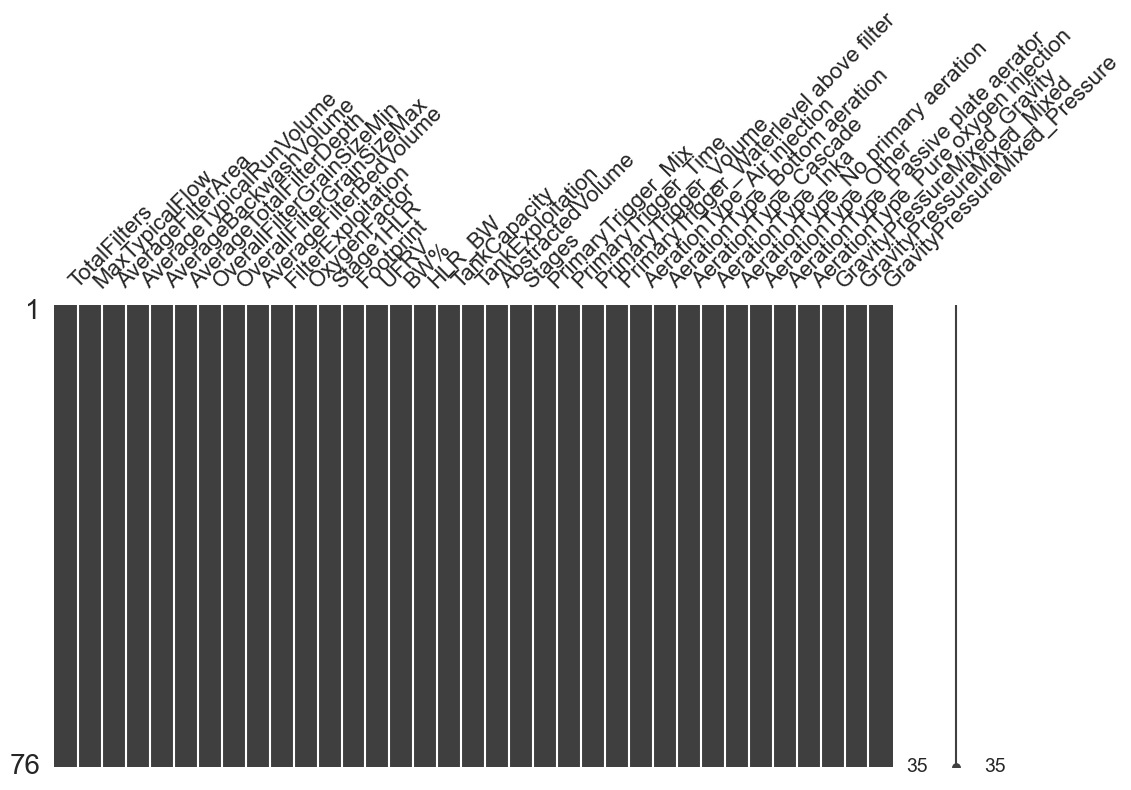

In [206]:
for column in random_data.columns:
    if column.startswith('Ran'):
        original_column = column[3:]
        if original_column in df.columns:
            df[original_column] = random_data[column]

columns_to_drop = [col for col in df.columns if col.endswith('_imp')]
df = df.drop(columns=columns_to_drop)

msno.matrix(df,figsize=(12,6))

### Step 6. If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.

In [207]:
display(df)

TotalFilters  MaxTypicalFlow  AverageFilterArea  AverageTypicalRunVolume  \
0         0.2632          0.0306             0.1002               7.8884e-02   
1         0.1579          0.0729             0.0768               7.9681e-04   
2         0.1579          0.0800             0.3007               5.6574e-02   
3         0.0526          0.5379             0.3148               1.5139e-02   
4         0.0526          0.2233             0.0036               1.0000e-09   
..           ...             ...                ...                      ...   
71        0.7895          1.0000             1.0000               2.2349e-02   
72        1.0000          0.9868             0.1899               6.7729e-02   
73        0.2632          0.1715             0.2880               3.3171e-02   
74        0.5789          0.2120             0.7747               6.6135e-02   
75        0.2105          0.2278             0.3362               3.8789e-02   

    AverageBackwashVolume  AverageTotalFilterDepth  OverallFilterGrainSizeMin  \
0                  0.0545                   0.2161                     0.0422   
1                  0.1612                   1.0000                     0.0857   
2                  0.4889                   0.4783                     0.4286   
3                  0.1493                   0.0870                     0.3316   
4                  0.0219                   0.5013                     0.3143   
..                    ...                      ...                        ...   
71                 0.6471                   0.2696                     0.0857   
72                 0.3330                   0.4783                     0.0857   
73                 0.3009                   0.3913                     0.2571   
74                 0.7893                   0.1185                     0.0727   
75                 0.2619                   0.3321                     0.2072   

    OverallFilterGrainSizeMax  AverageFilterBedVolume  FilterExploitation  \
0                      0.1034                  0.0287              0.4169   
1                      0.0242                  0.2288              0.4721   
2                      0.2261                  0.4621              0.4857   
3                      0.1242                  0.1668              0.3298   
4                      0.2059                  0.4919              0.1699   
..                        ...                     ...                 ...   
71                     1.0000                  1.0000              0.7482   
72                     0.0444                  0.2987              0.7257   
73                     0.0175                  0.3961              0.0392   
74                     0.2590                  0.4933              0.6228   
75                     0.2261                  0.2260              0.0912   

    OxygenFactor  Stage1HLR  Footprint        UFRV     BW%  HLR_BW  \
0         0.6104     0.0384     0.3342  9.7380e-01  0.0097  0.3864   
1         0.3994     0.6864     0.0207  1.0000e-09  0.6492  0.4454   
2         0.8810     0.2065     0.0900  2.4580e-01  0.0600  0.4785   
3         0.7673     0.1194     0.4610  4.0390e-02  0.0593  0.9815   
4         0.1504     0.3661     1.0000  1.4913e-01  0.0494  0.2240   
..           ...        ...        ...         ...     ...     ...   
71        0.3398     0.2928     0.0390  4.1526e-01  0.0030  0.6406   
72        0.8160     0.4031     0.0339  4.7321e-01  0.0329  0.7493   
73        0.4426     0.1331     0.4969  1.3830e-01  0.1238  0.4426   
74        0.8701     0.3077     0.3569  6.2190e-02  1.0000  0.4675   
75        0.7998     0.2029     0.2693  1.3811e-01  0.0446  0.3400   

    TankCapacity  TankExploitation  AbstractedVolume  Stages  \
0     2.6336e-01            0.0497        2.1561e-02       2   
1     1.0000e-09            0.2247        5.2881e-02       0   
2     2.0509e-01            0.1613        5.9015e-02       0   
3     1.0631e-01            0.4903        1.3128

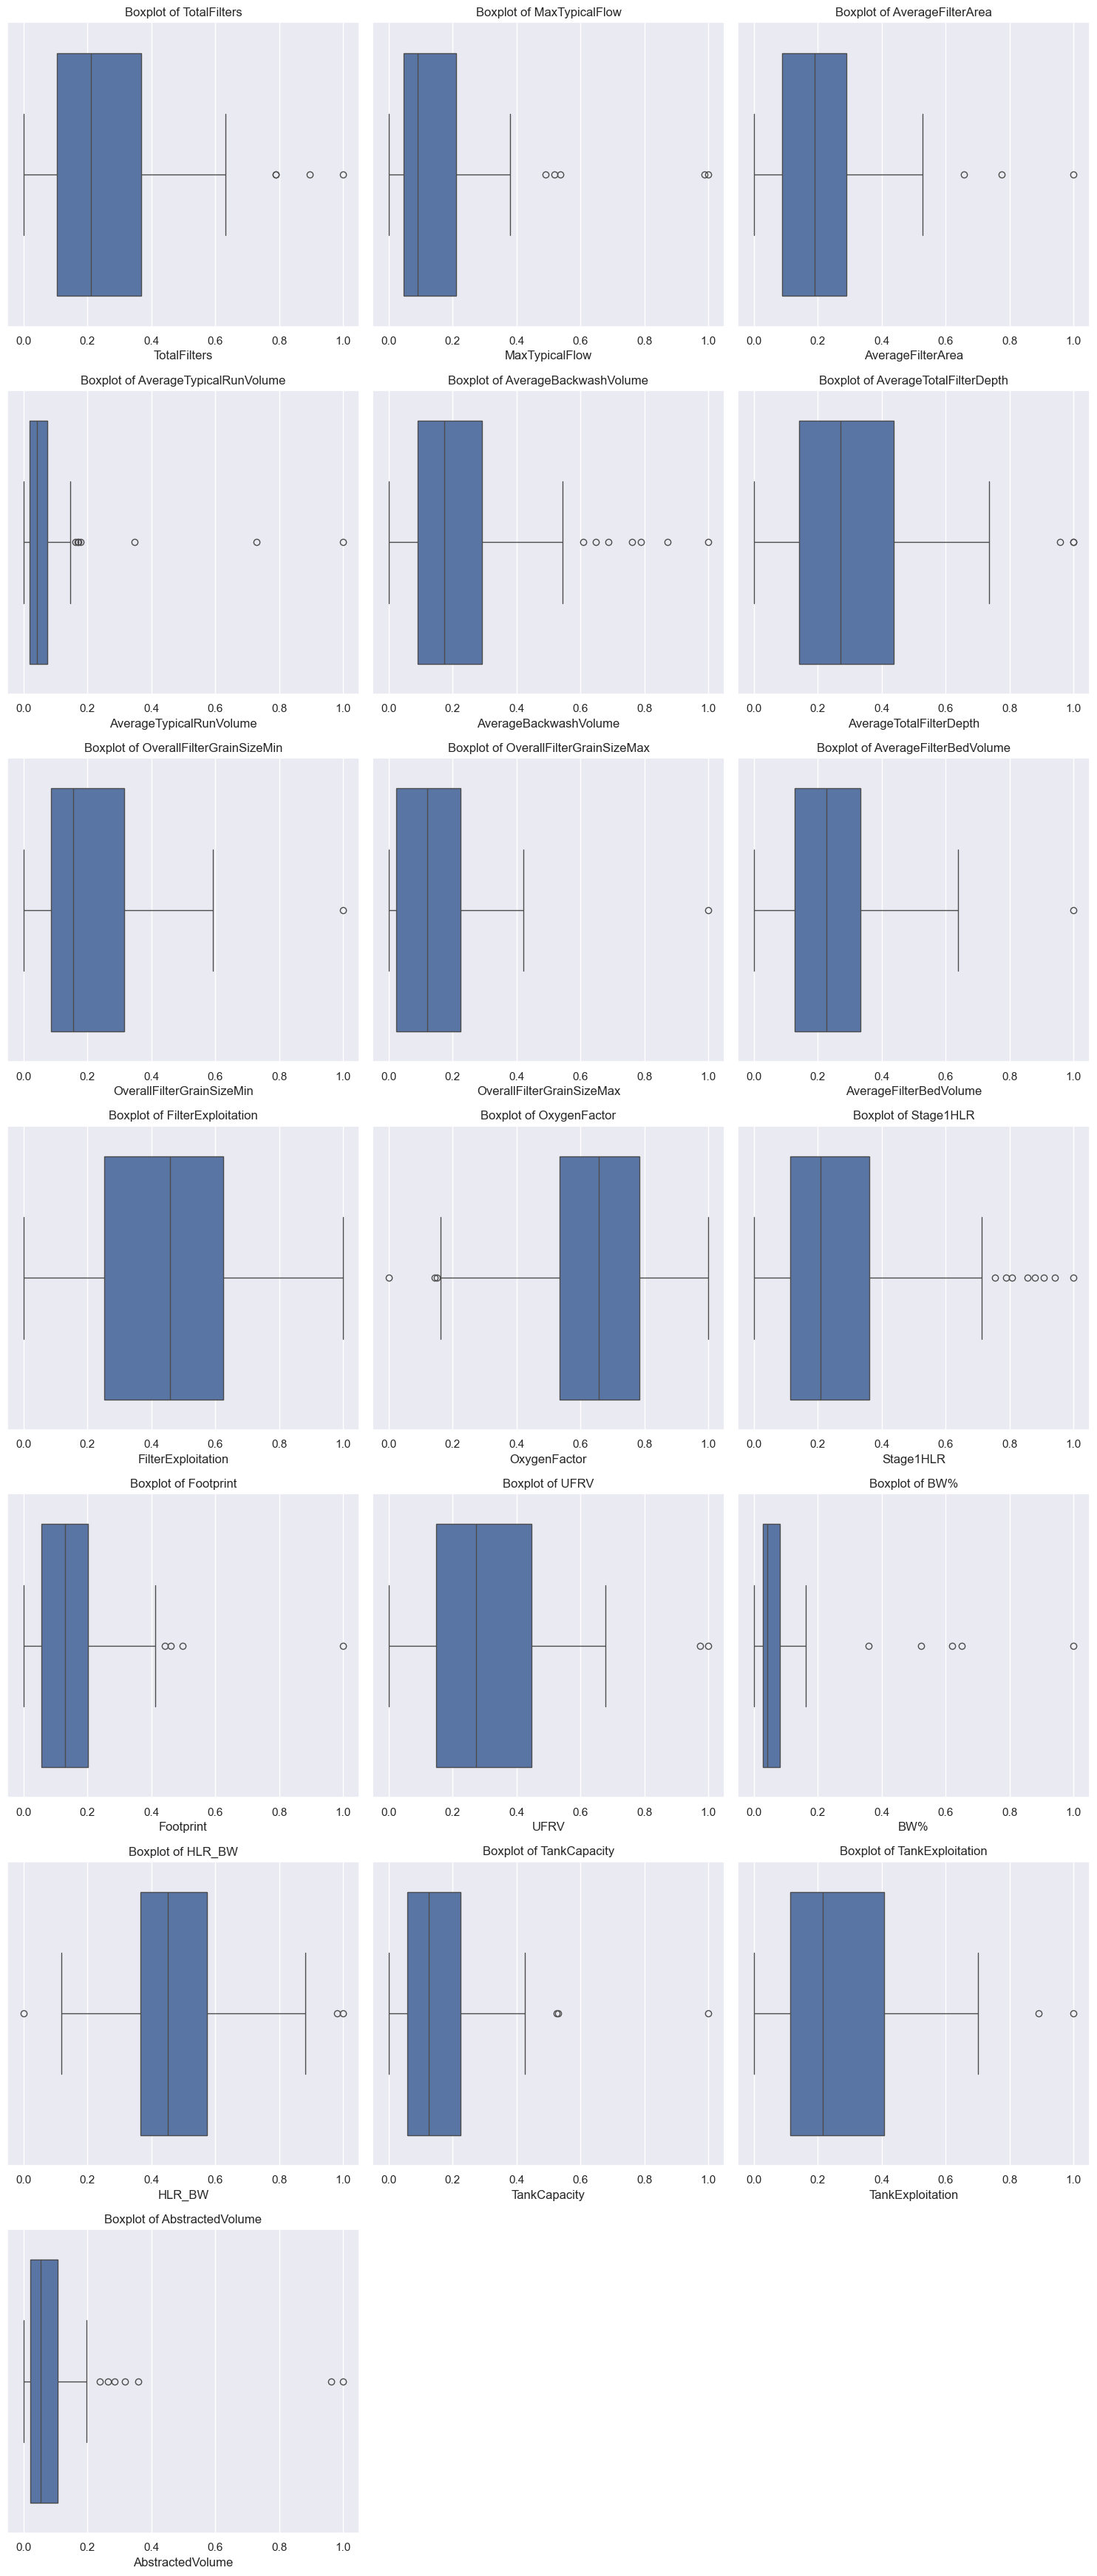

In [208]:
num_features = len(numeric_columns.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_features > 1:
    axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Step 7. Create a correlation matrix and discuss - based on this, you might want to drop certain columns.

In [209]:
def create_corr_matrix(cr):
    correlation_matrix = cr
    pd.set_option("display.max.columns", None)
    pd.set_option("display.precision", 4)
    plt.figure(figsize=(50, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

In [210]:
def print_sum_of_corr(cr):
    correlation_matrix = cr
    sum_of_correlations = {}
    for feature in correlation_matrix.columns:
        sum_of_correlations[feature] = correlation_matrix[feature].abs().drop(feature).sum()
    sorted_sum_of_correlations = sorted(sum_of_correlations.items(), key=lambda x: x[1], reverse=True)
    print("Sum of correlations for each feature (sorted):")
    for feature, sum_corr in sorted_sum_of_correlations:
        display(f"{feature}: {sum_corr}")

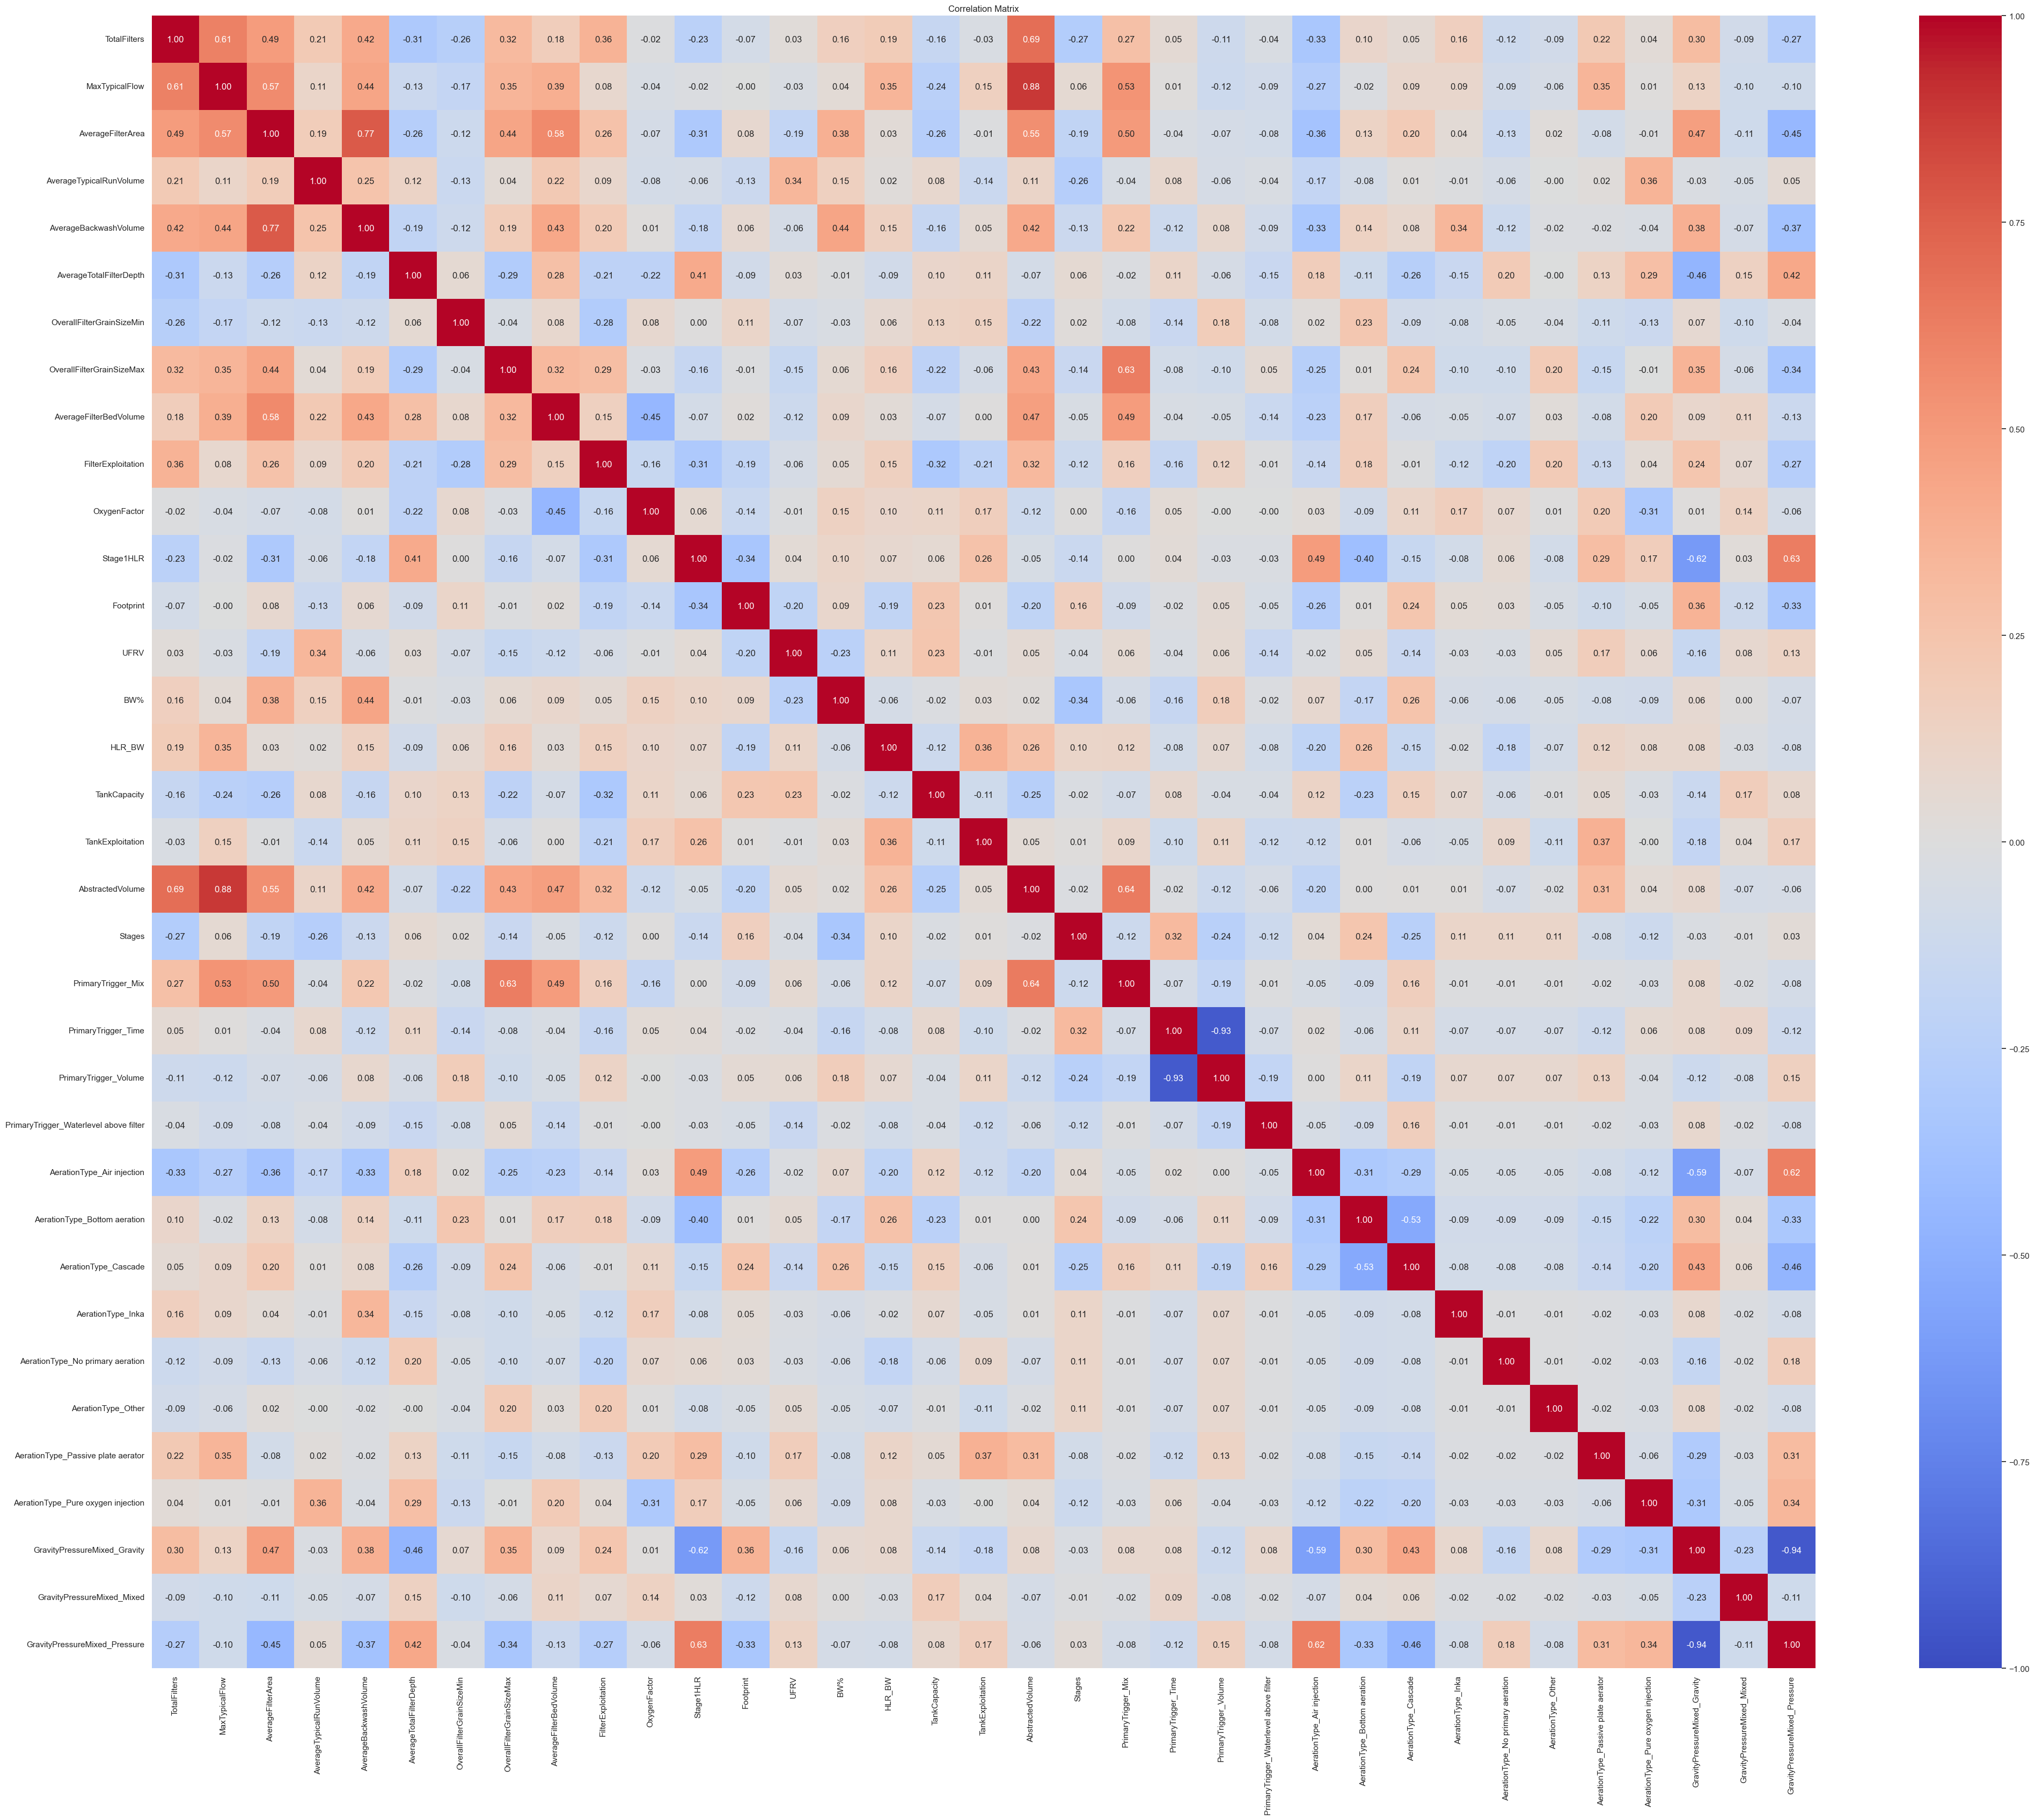

Sum of correlations for each feature (sorted):


'AverageFilterArea: 8.426174853560836'

'GravityPressureMixed_Gravity: 8.039857526296789'

'GravityPressureMixed_Pressure: 7.9155316669348'

'TotalFilters: 7.25547119185807'

'AverageBackwashVolume: 7.082721002028186'

'AbstractedVolume: 6.881792239692525'

'MaxTypicalFlow: 6.733837108965403'

'OverallFilterGrainSizeMax: 6.374971973908366'

'AerationType_Air injection: 6.179321848054502'

'Stage1HLR: 5.977214015475121'

'AverageFilterBedVolume: 5.9383747991694245'

'FilterExploitation: 5.875248933879773'

'AverageTotalFilterDepth: 5.708977590738709'

'AerationType_Cascade: 5.602330403638659'

'PrimaryTrigger_Mix: 5.20917946503949'

'AerationType_Bottom aeration: 5.128138047728611'

'AerationType_Passive plate aerator: 4.490937281913569'

'TankCapacity: 4.24935154693966'

'HLR_BW: 4.2166004733817255'

'PrimaryTrigger_Volume: 4.20130511621616'

'Footprint: 4.1324172489261715'

'Stages: 4.051680183863275'

'BW%: 3.875829077530051'

'AverageTypicalRunVolume: 3.79566562689838'

'PrimaryTrigger_Time: 3.6696352661948706'

'AerationType_Pure oxygen injection: 3.6674260734082686'

'OverallFilterGrainSizeMin: 3.5827286114144714'

'TankExploitation: 3.5370842965828073'

'OxygenFactor: 3.4138552354903626'

'UFRV: 3.219134300580113'

'AerationType_No primary aeration: 2.734383860121511'

'GravityPressureMixed_Mixed: 2.465309048132199'

'AerationType_Inka: 2.4305214665916535'

'PrimaryTrigger_Waterlevel above filter: 2.27605037861558'

'AerationType_Other: 1.8715032430161225'

In [211]:
correlation_matrix = df.corr()
create_corr_matrix(correlation_matrix)
print_sum_of_corr(correlation_matrix)

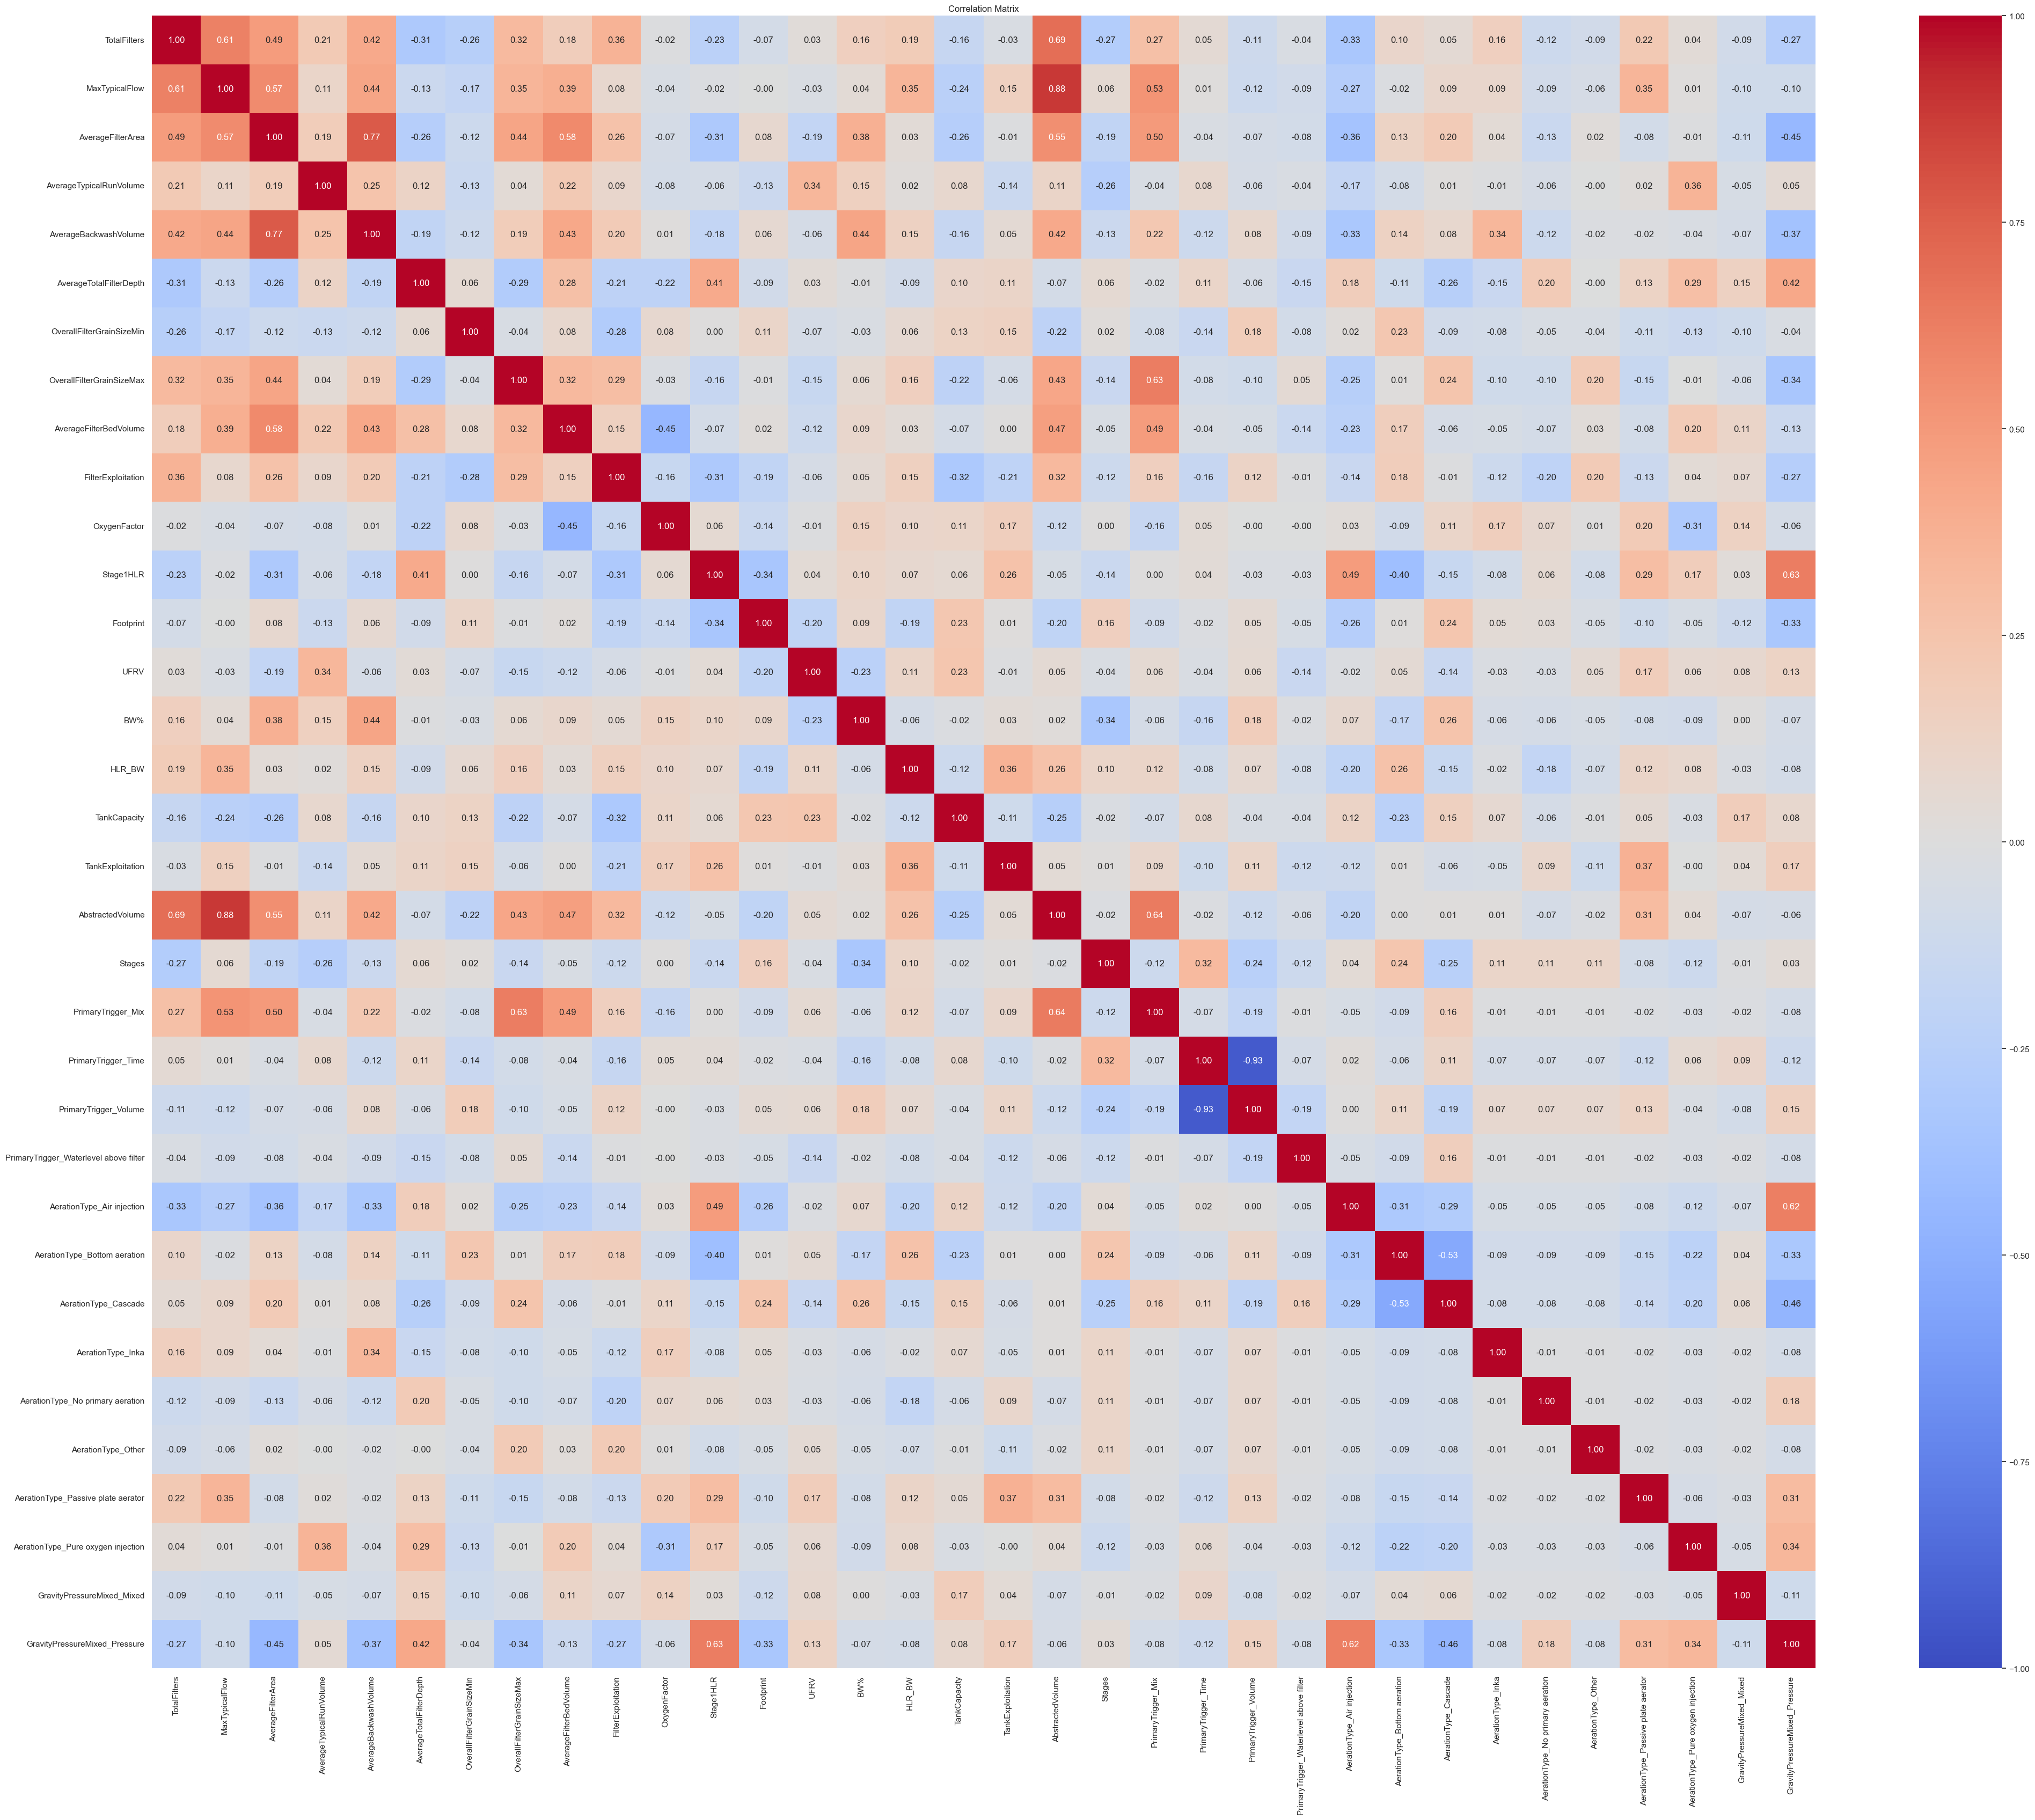

Sum of correlations for each feature (sorted):


'AverageFilterArea: 7.954885566776957'

'GravityPressureMixed_Pressure: 6.974636870016503'

'TotalFilters: 6.957009440853395'

'AbstractedVolume: 6.804053112250284'

'AverageBackwashVolume: 6.7004608747308065'

'MaxTypicalFlow: 6.605014259497936'

'OverallFilterGrainSizeMax: 6.020116009750452'

'AverageFilterBedVolume: 5.849587255003108'

'FilterExploitation: 5.638498628861894'

'AerationType_Air injection: 5.591758430855329'

'Stage1HLR: 5.352400743704878'

'AverageTotalFilterDepth: 5.245520260907731'

'AerationType_Cascade: 5.171742168344542'

'PrimaryTrigger_Mix: 5.128334256694046'

'AerationType_Bottom aeration: 4.8256275437093015'

'AerationType_Passive plate aerator: 4.2013934744537025'

'HLR_BW: 4.132032902811284'

'TankCapacity: 4.11172558218785'

'PrimaryTrigger_Volume: 4.081817769430269'

'Stages: 4.023221937075547'

'BW%: 3.8109348363573727'

'Footprint: 3.770204741288546'

'AverageTypicalRunVolume: 3.767357029566196'

'PrimaryTrigger_Time: 3.5887900578494265'

'OverallFilterGrainSizeMin: 3.5126241482933995'

'OxygenFactor: 3.399549294801311'

'TankExploitation: 3.3594243205658154'

'AerationType_Pure oxygen injection: 3.3531233830934664'

'UFRV: 3.0635016243584903'

'AerationType_No primary aeration: 2.5694596350968046'

'AerationType_Inka: 2.349676258246209'

'GravityPressureMixed_Mixed: 2.230500327818972'

'PrimaryTrigger_Waterlevel above filter: 2.1952051702701354'

'AerationType_Other: 1.7906580346706782'

In [212]:
# From the correlation matrix it can be seen that GravityPressureMixed_Pressure and GravityPressureMixed_Gravity have the highest correlation among all the features.
# Then we look into sum of all correlations calculated for each feature separately and choose the biggest one.
# In the first case it is GravityPressureMixed_Gravity which will be deleted from the dataset.

df.drop(columns=["GravityPressureMixed_Gravity"], axis=1, inplace=True)

# After dropping this column we can create correlation matrix again and repeat the process.
correlation_matrix = df.corr()
create_corr_matrix(correlation_matrix)
print_sum_of_corr(correlation_matrix)

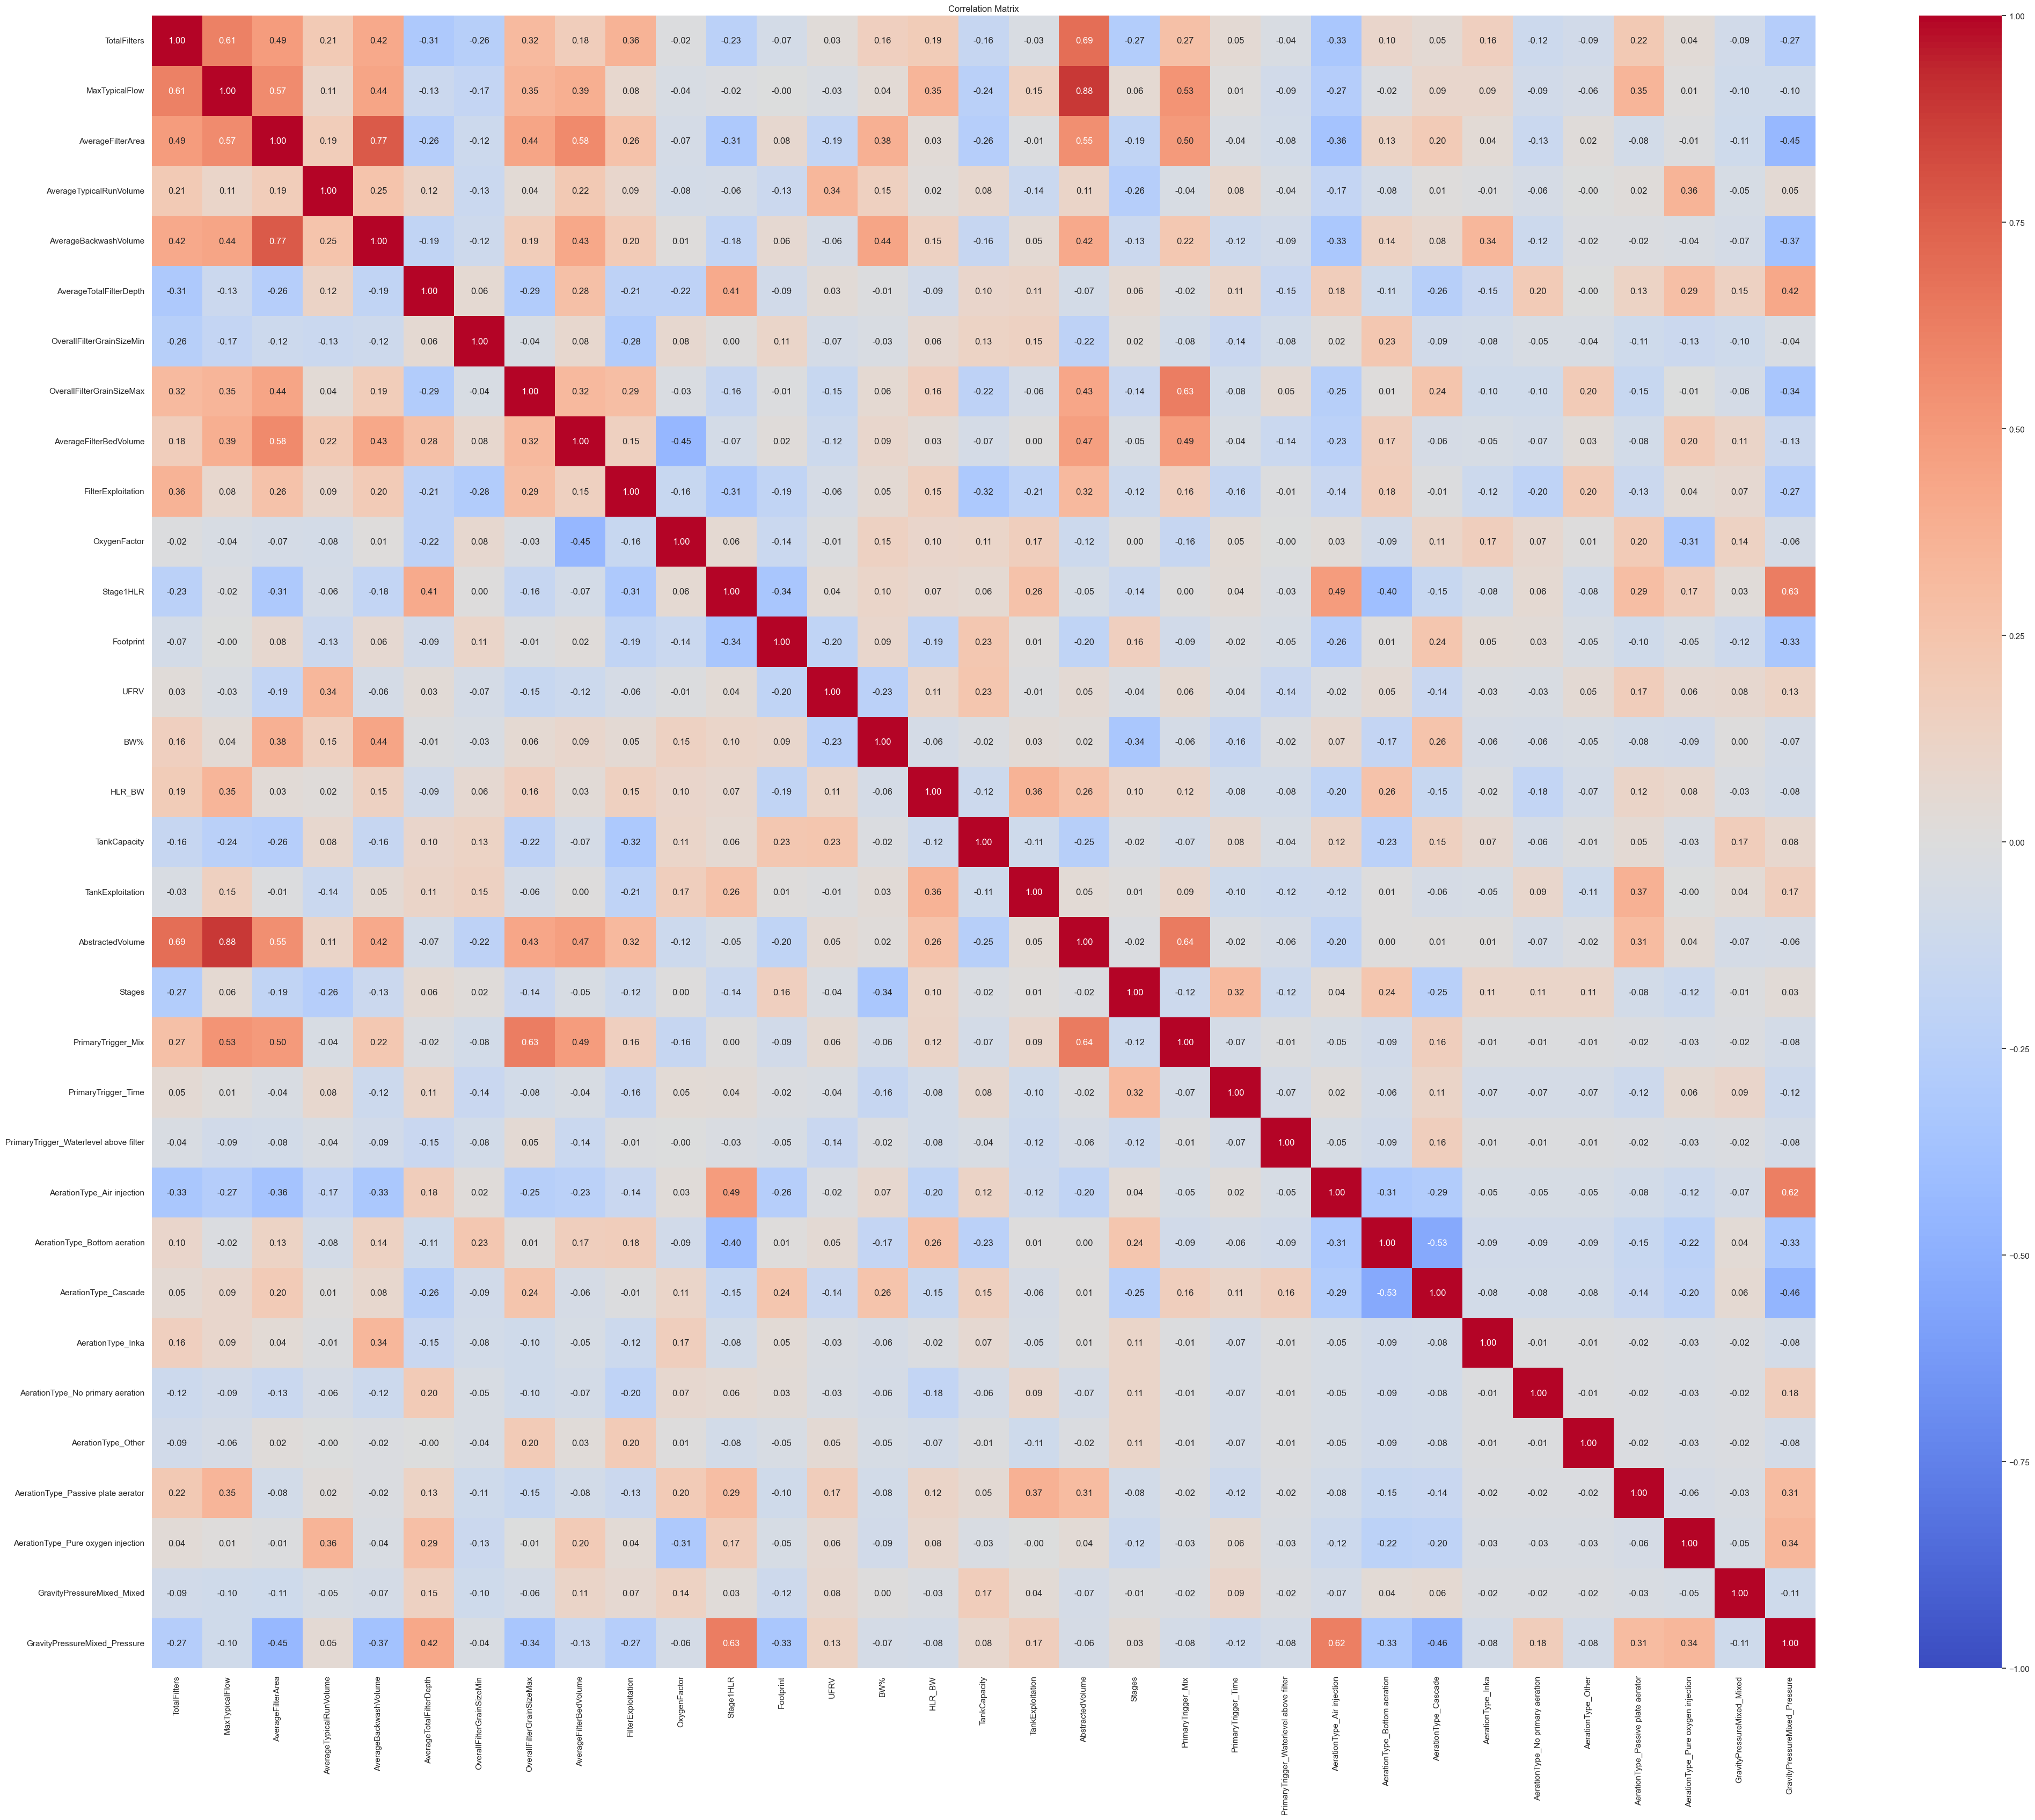

Sum of correlations for each feature (sorted):


'AverageFilterArea: 7.88501172285798'

'TotalFilters: 6.844399830253878'

'GravityPressureMixed_Pressure: 6.823781704371624'

'AbstractedVolume: 6.67922956733422'

'AverageBackwashVolume: 6.6158147980370785'

'MaxTypicalFlow: 6.480477524896949'

'OverallFilterGrainSizeMax: 5.924613765464236'

'AverageFilterBedVolume: 5.801412242271429'

'AerationType_Air injection: 5.588457189768045'

'FilterExploitation: 5.520114852874275'

'Stage1HLR: 5.3240058197868025'

'AverageTotalFilterDepth: 5.18408311483002'

'AerationType_Cascade: 4.978090261484648'

'PrimaryTrigger_Mix: 4.941463619833583'

'AerationType_Bottom aeration: 4.719681851036507'

'AerationType_Passive plate aerator: 4.076129121356296'

'TankCapacity: 4.068502376171082'

'HLR_BW: 4.064836154057045'

'Stages: 3.780188014384237'

'Footprint: 3.718405362778907'

'AverageTypicalRunVolume: 3.708960200750505'

'BW%: 3.633464198246082'

'OxygenFactor: 3.396565361011246'

'OverallFilterGrainSizeMin: 3.330069292398756'

'AerationType_Pure oxygen injection: 3.3157934070981243'

'TankExploitation: 3.2516963305854576'

'UFRV: 3.00518395515763'

'PrimaryTrigger_Time: 2.6544368735471133'

'AerationType_No primary aeration: 2.4981090282955374'

'AerationType_Inka: 2.2783256514449417'

'GravityPressureMixed_Mixed: 2.1482652576687813'

'PrimaryTrigger_Waterlevel above filter: 2.0083345334096734'

'AerationType_Other: 1.7193074278694107'

In [213]:
df.drop(columns=["PrimaryTrigger_Volume"], axis=1, inplace=True)

correlation_matrix = df.corr()
create_corr_matrix(correlation_matrix)
print_sum_of_corr(correlation_matrix)

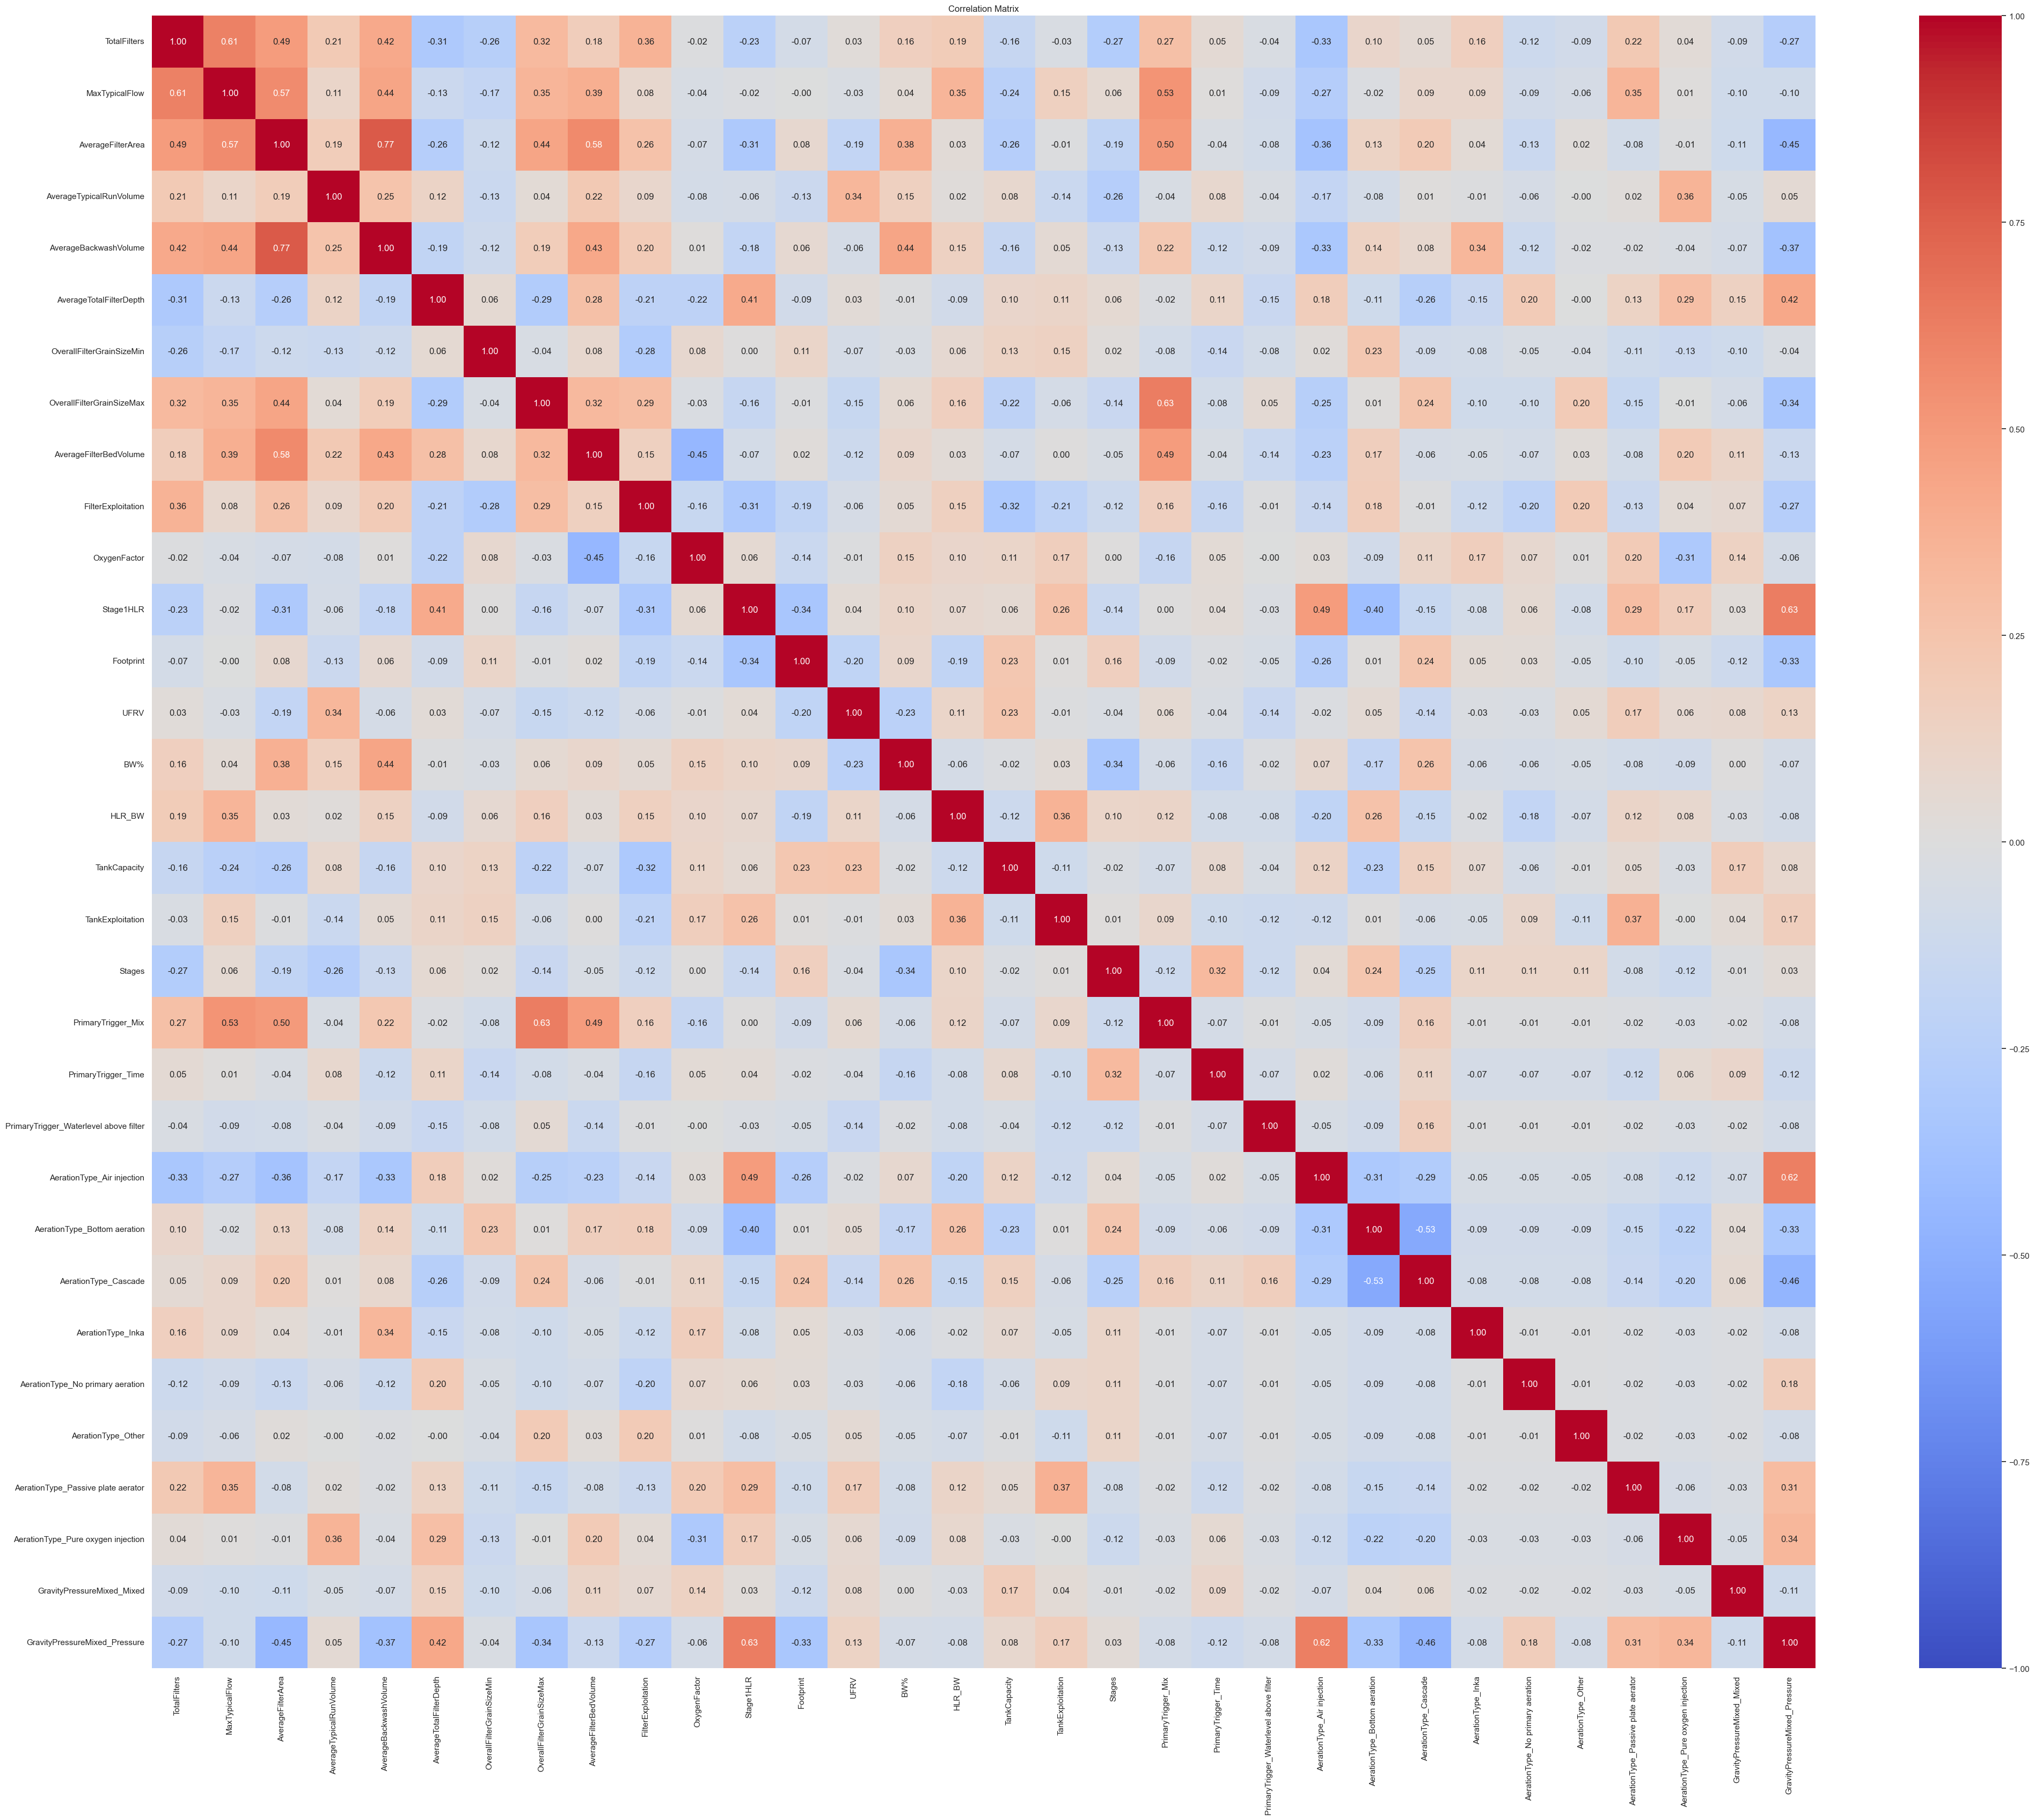

In [214]:
df.drop(columns=["AbstractedVolume"], axis=1, inplace=True)

correlation_matrix = df.corr()
create_corr_matrix(correlation_matrix)

After repeating the process three times we could drop three features with the highest correlactions.
Now, none of the correlations exceeds value of |0.8|. 

### Step 8. Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.

In [215]:
numeric_columns = df.select_dtypes(include='number')
skewness = numeric_columns.skew().sort_values(ascending=False)

print("Skewness for each numeric column (sorted):")
print(skewness)

Skewness for each numeric column (sorted):
AverageTypicalRunVolume      5.0666
BW%                          4.0070
MaxTypicalFlow               2.7973
Footprint                    2.7967
TankCapacity                 2.6639
OverallFilterGrainSizeMax    2.3966
AverageBackwashVolume        1.6324
AverageFilterArea            1.6299
OverallFilterGrainSizeMin    1.6276
Stage1HLR                    1.3112
AverageFilterBedVolume       1.2394
TotalFilters                 1.2183
TankExploitation             1.0538
AverageTotalFilterDepth      1.0009
UFRV                         0.9436
HLR_BW                       0.4436
FilterExploitation           0.0546
Stages                      -0.0834
OxygenFactor                -0.7734
dtype: float64


We decided that all columns with skewness cooficent being moore then 1.0 will need to be transformed.

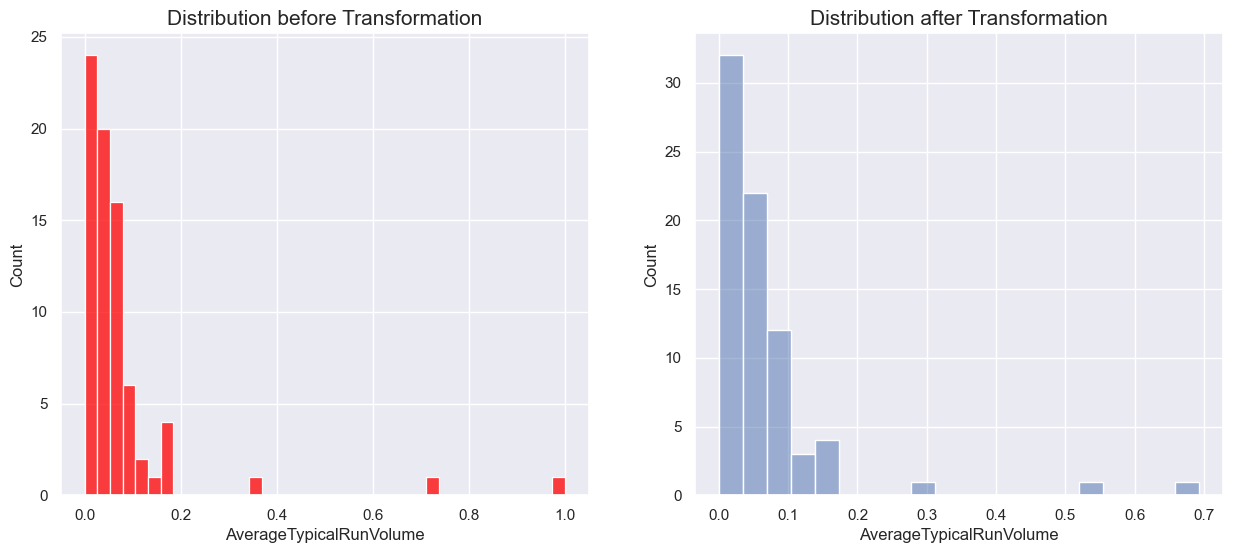

Skewness was 5.07 before & is 4.42 after Log transformation.


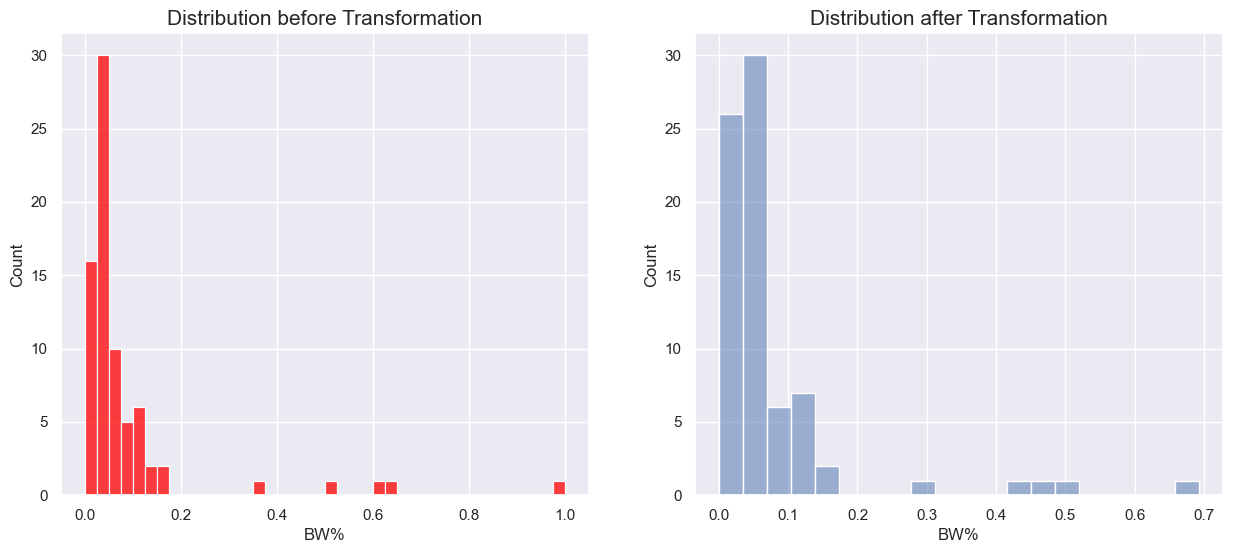

Skewness was 4.01 before & is 3.55 after Log transformation.


In [216]:
# Based on the list above we can see that the features "AverageTypicalRunVolume" and "BW%" have a positive number, which means that they are right-skewed.
# To transform the righ-skewed data we can use logTrans function.

def logTrans(feature):
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=False, color="red")
    plt.subplot(1,2,2)
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=False , legend=False)
    plt.xlabel(feature)
    plt.show()
    print(f"Skewness was {round(skewness[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")    
logTrans(feature="AverageTypicalRunVolume")
logTrans(feature="BW%")

The degree to which the data is skewed, in case of AverageTypicalRunVolume, is above 4, where apllying logaritmic transformation reduces skewness slightly.
Based on that information, we decided to use Yeo–Johnson transformation which is automatically selecting the optimal tranformation parameter (lambda). This transformation allows for zero and negative values compared to box-cox where the values must be positive.

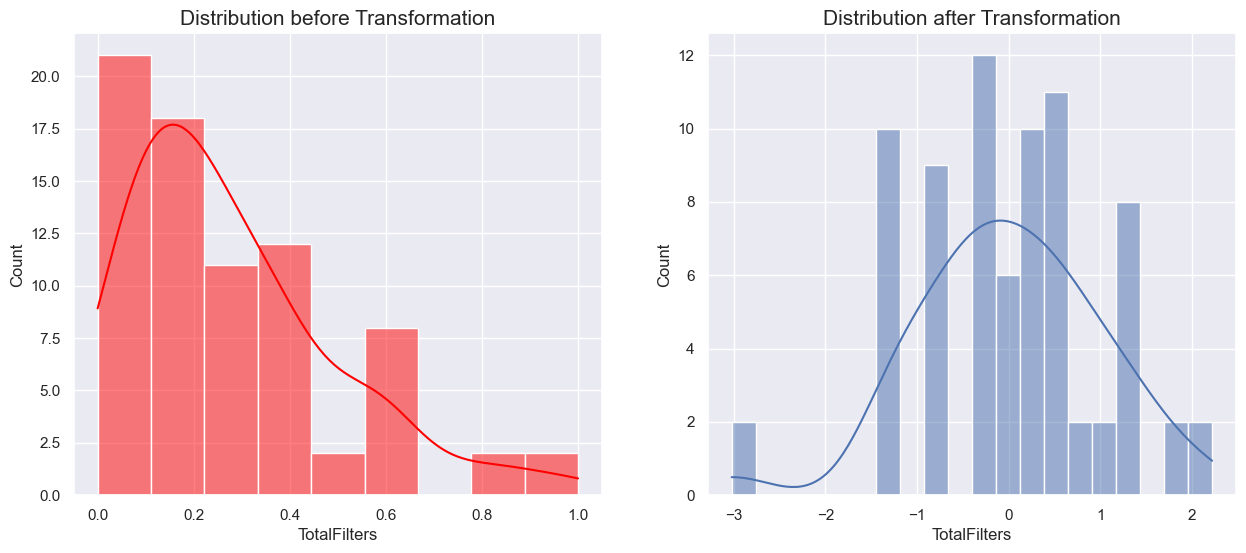

Skewness was 1.22 before & is -0.35 after box-cox transformation.


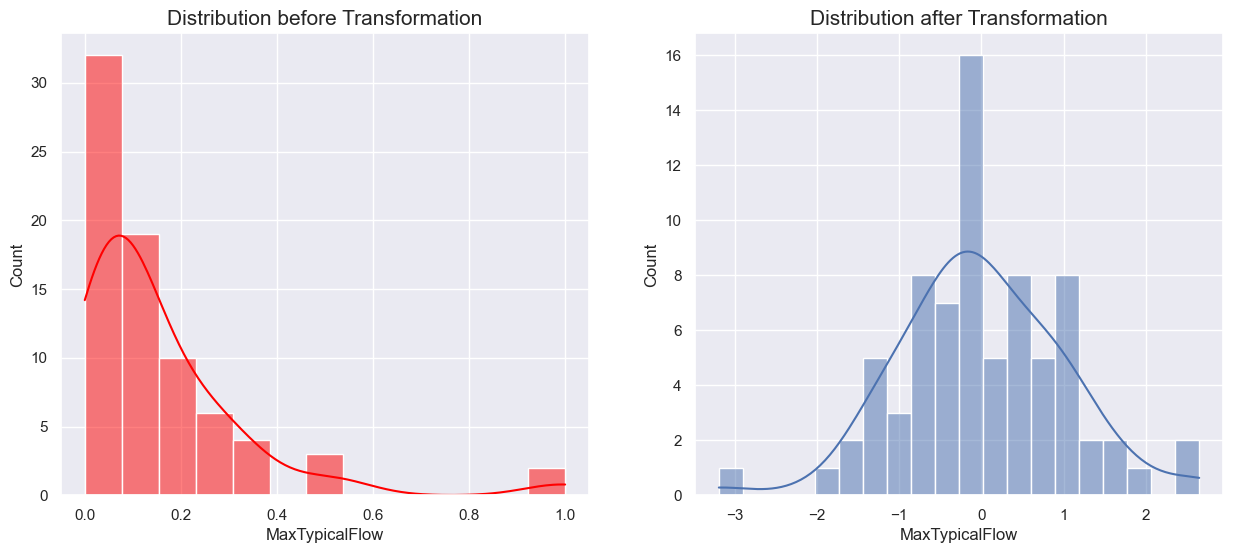

Skewness was 2.8 before & is 0.04 after box-cox transformation.


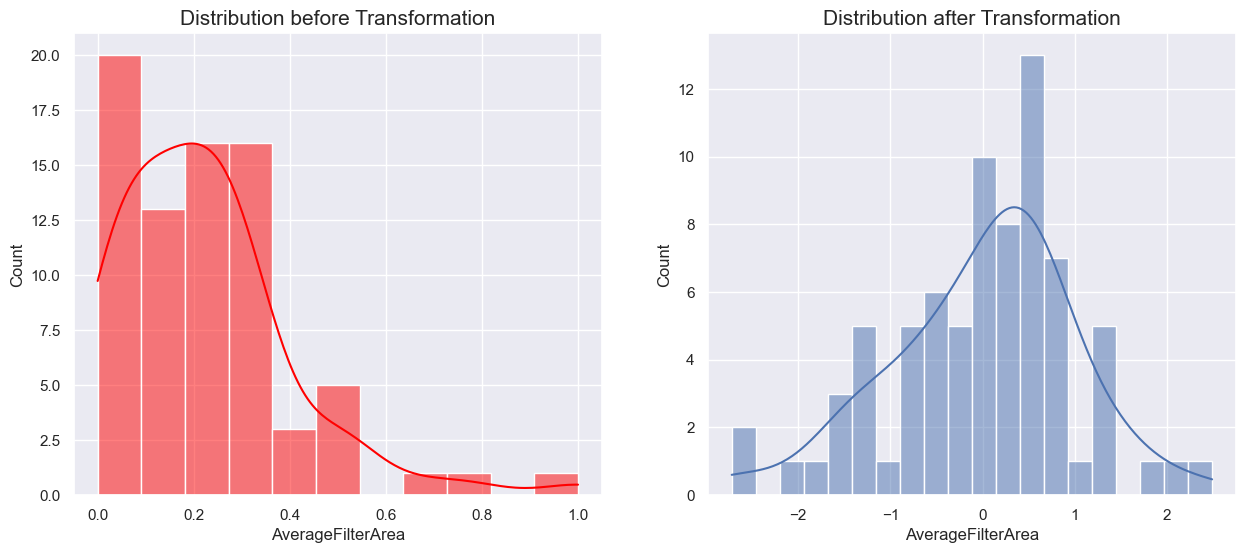

Skewness was 1.63 before & is -0.43 after box-cox transformation.


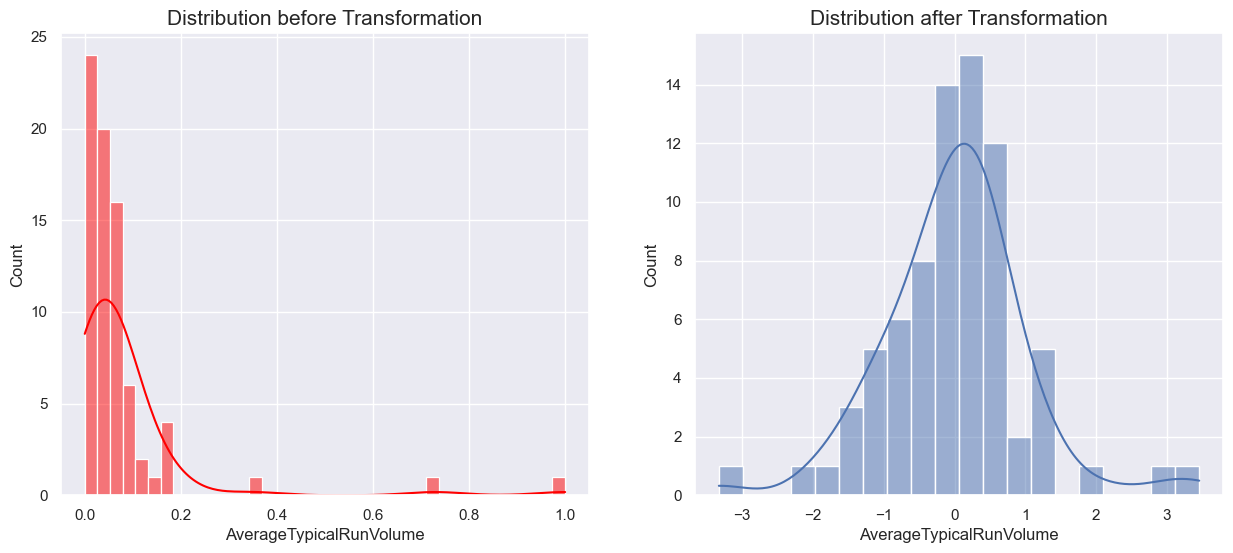

Skewness was 5.07 before & is 0.24 after box-cox transformation.


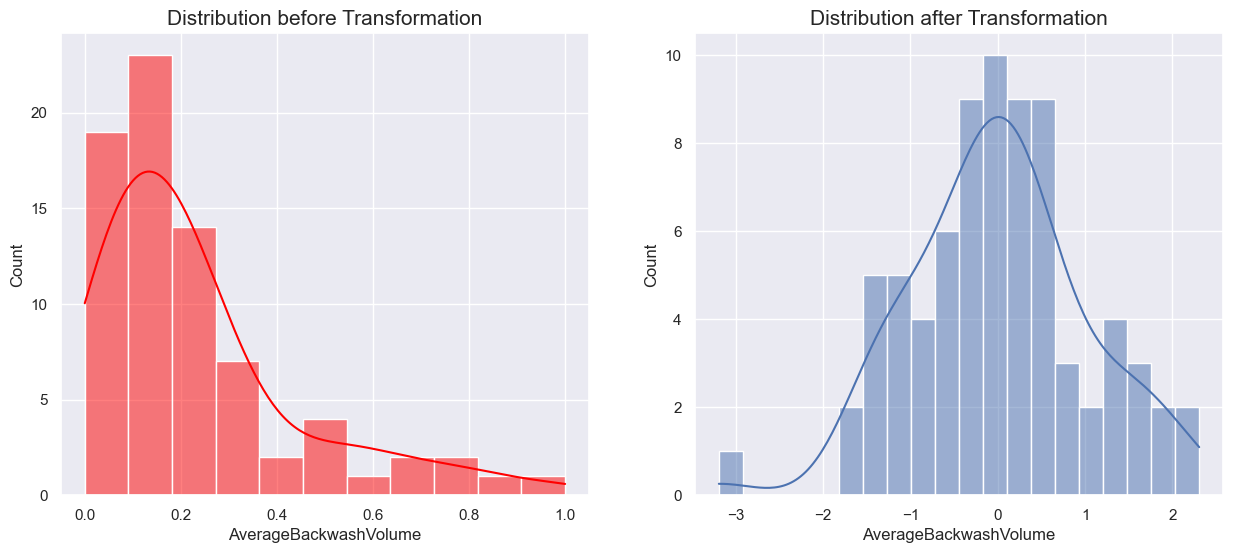

Skewness was 1.63 before & is -0.07 after box-cox transformation.


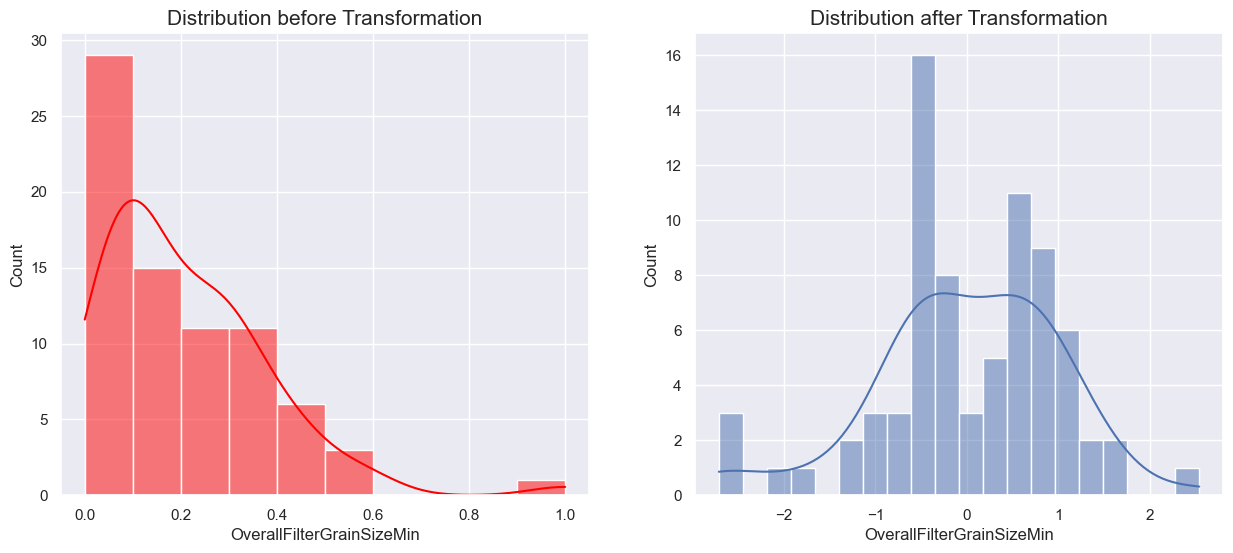

Skewness was 1.63 before & is -0.56 after box-cox transformation.


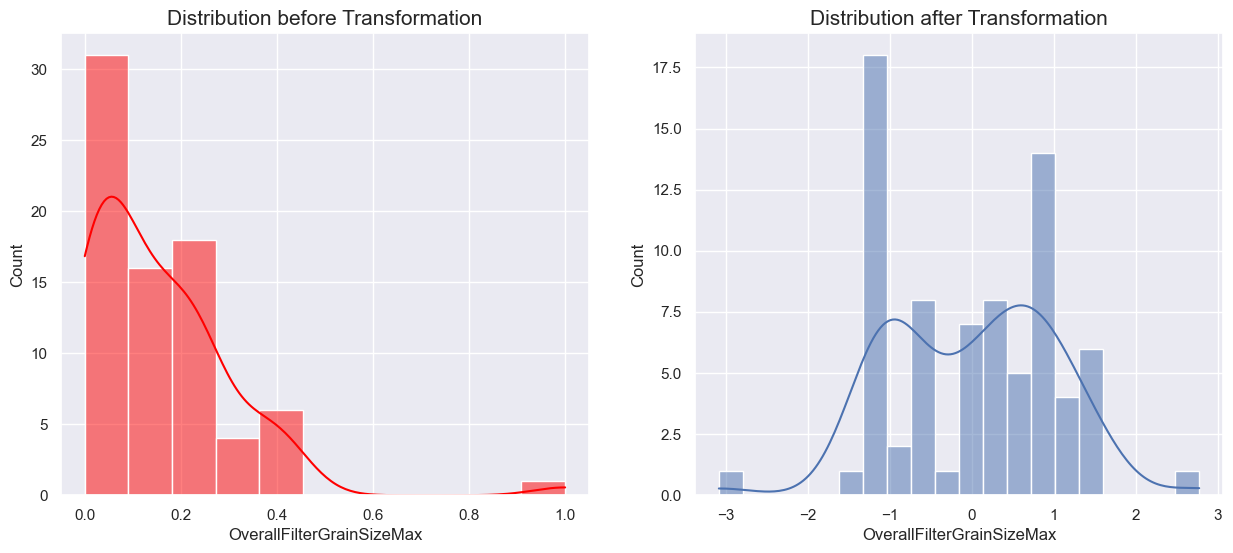

Skewness was 2.4 before & is -0.1 after box-cox transformation.


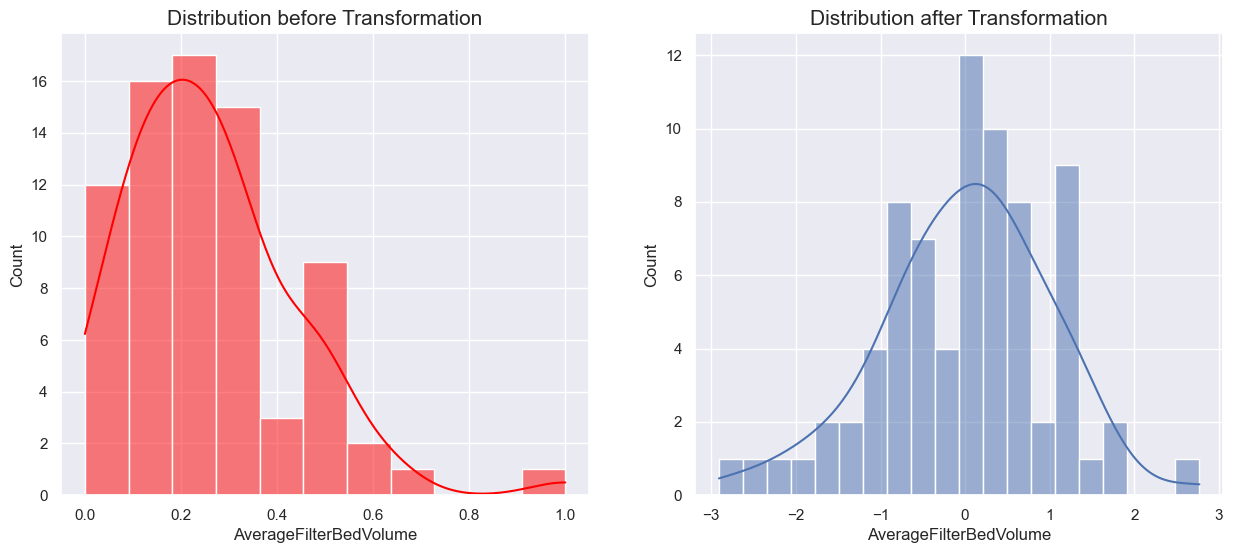

Skewness was 1.24 before & is -0.3 after box-cox transformation.


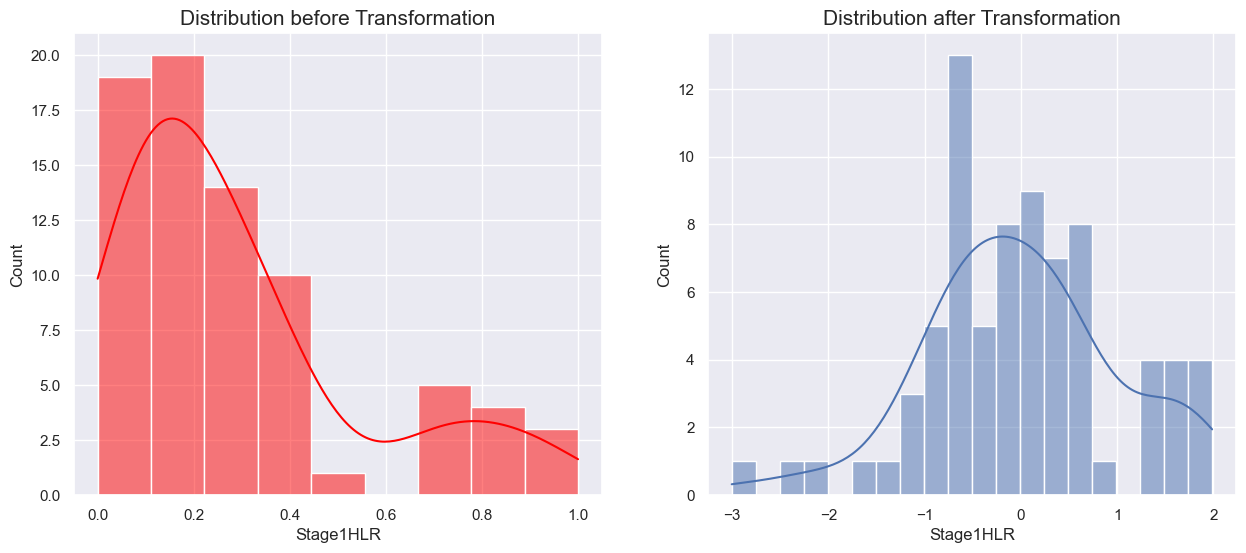

Skewness was 1.31 before & is -0.14 after box-cox transformation.


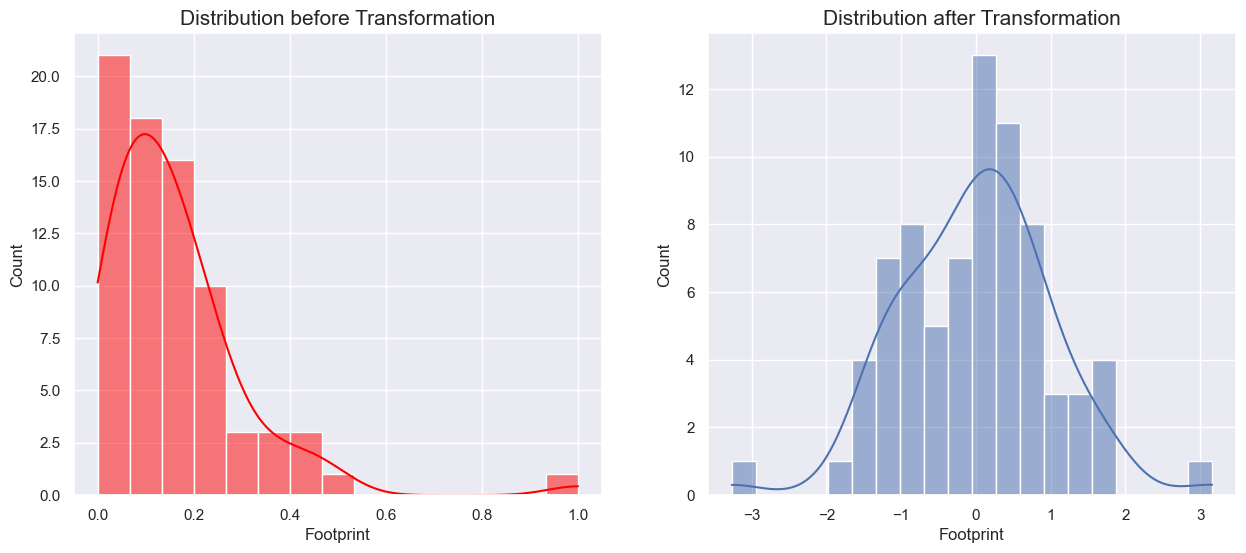

Skewness was 2.8 before & is -0.02 after box-cox transformation.


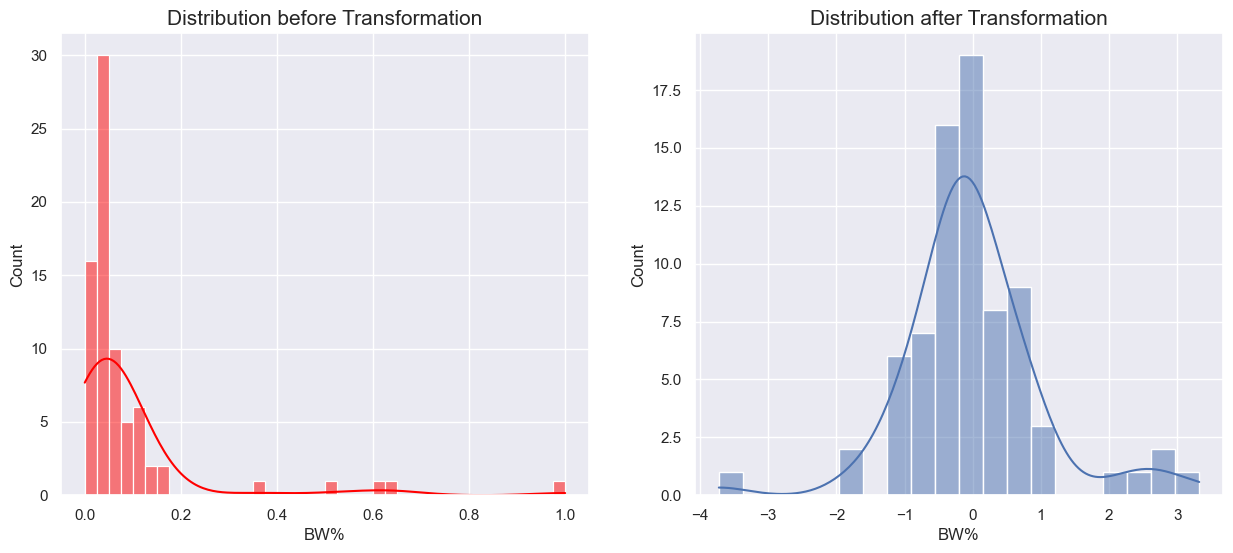

Skewness was 4.01 before & is 0.4 after box-cox transformation.


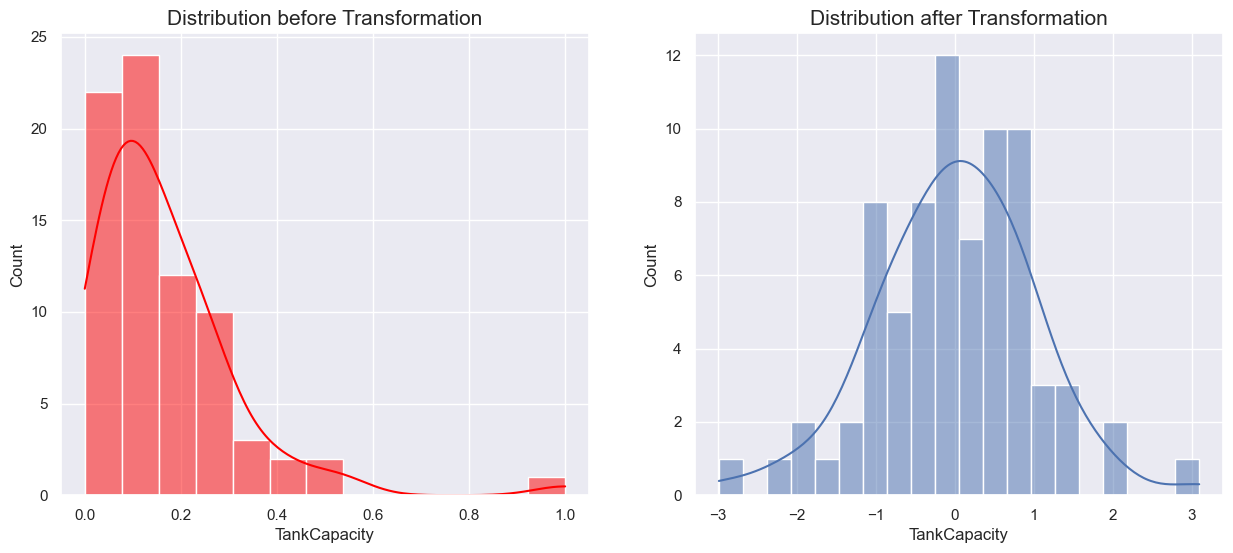

Skewness was 2.66 before & is -0.09 after box-cox transformation.


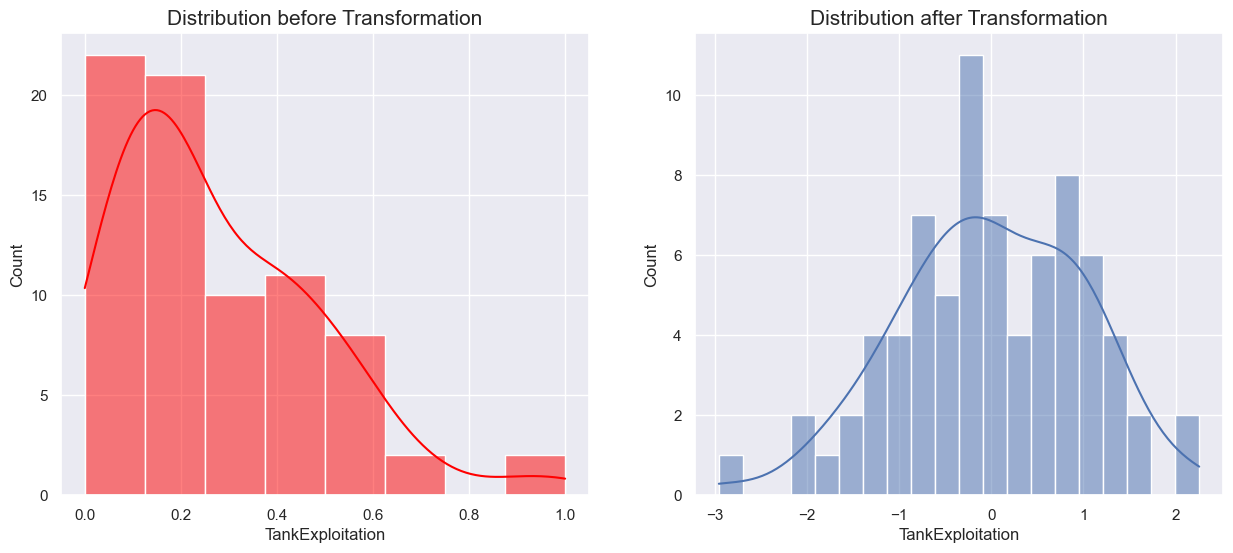

Skewness was 1.05 before & is -0.26 after box-cox transformation.


In [217]:
def skewed_columns(df):
    return df.select_dtypes(include=[np.number]).columns.tolist()
def boxcoxtrans(feature):
    
    boxcoxTr = PowerTransformer(standardize=True, method="box-cox")

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], color="red",  kde=True)
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(boxcoxTr.fit_transform(df[feature].values.reshape(-1,1)))
    df[feature] = df_yeojohn
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, legend=False, kde=True)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(skewness[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after box-cox transformation.")

for feature in skewed_columns(numeric_columns):
    if skew(numeric_columns[feature]) >= 1:
        boxcoxtrans(feature=feature)


As can be seen above, Yeo-johnson transformation significantly decreased the skewness.

### Step 9. There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions.

There are multiple challenges when working with a small dataset. One significant issue is the lack of statistical significance and high variance. For instance, when we applied the Interquartile Range (IQR) method for outlier detection, a substantial number of data points were classified as outliers, but some of them could have been valid observations. With a small sample size, it becomes difficult to distinguish between genuine outliers and legitimate data points, leading to potential misclassification.
Another concern arises when imputing missing data. With a limited number of observations, there is an increased risk of overfitting and limited representativeness. The available data may not adequately capture the true distribution or patterns, making it challenging to confidently estimate and impute the missing values. This problem is further compounded by the curse of dimensionality – meaning the high ratio of features to data points, leading to sparse data.

In terms of machine learning, a potential solution to reduce the risk of overfitting would be to use simpler models with fewer features.
To maximize the utility of the dataset, we could employ the cross-validation method. This method allows us to train and validate on each data point. Additionally, we could extend the dataset by generating synthetic samples or by incorporating additional sources of potentially similar data. Synthetic samples can be generated by applying transformations or perturbations to the existing data, resulting in a new set of samples.

### Step 10. Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

# With this development, we consider our dataset clean.

In [218]:
df.to_excel('data_preporcessing_check.xlsx')